<center><font size="+4">Giornata di Orientamento Studiare Economia e Management alla Scuola Sant'Anna 2025/2026</font></center>
<center><font size="+2">Sant'Anna School of Advanced Studies, Pisa, Italy</font></center>
<center><img src="https://github.com/EMbeDS-education/ComputingDataAnalysisModeling20242025/raw/main/PDAI/jupyter/jupyterNotebooks/images/sssaLEMBEDSdtu.png" width="900" alt="L'EMbeDS"></center>

<center><font size="+2">Andrea Vandin a.vandin@santannapisa.it</font></center>

---

<center><font size="+4">Advanced Libraries for </font></center>
<center><font size="+4"> data manipulation/visualization:</font></center>
<br/>
<center><font size="+4"> Numpy and Pandas</font></center>
<br/>
<center><font size="+2"> With applications to COVID and Finance data</font></center>

---

In [2]:
from IPython.display import Image, display
url_github_repo="https://github.com/EMbeDS-education/ComputingDataAnalysisModeling20252026/raw/main/PDAI/"

---

## What is this notebook about

This notebook is mainly based on Chapter 4 of the following book:
* [Python for Data Analysis, 2nd edition, William Wesley McKinney (O’Reilly)](https://www.oreilly.com/library/view/python-for-data/9781491957653/)
* [Freely available Jupyter notebooks covering the examples/material of each chapter](https://github.com/wesm/pydata-book)
* Some pictures have been taken from these sources

In particular, this notebook introduces the libraries:
* [NumPy](https://numpy.org/): for scientific computing
* [Pandas](https://pandas.pydata.org/): 
   * for working with structured data (CSV, Spreadsheets, Databases)
   * for creating advanced plots

> Note: in this notebook we will often refer interchangeably to _arrays_, _NumPy arrays_ or just _ndarrays_. 
<br/>
> You can think of __arrays as lists with better performances__ for numerical computing

---

# NumPy
NumPy, _Numerical Python_, is the Python package for __scientific computing__

It provides:
* An efficient implementation for list-like multidimensional data structures named __NumPy arrays__ or __ndarray__
  * including functions for performing
    * element-wise computations on arrays 
    * mathematical operations between arrays
* Tools for reading/writing datasets from/to disk and arrays
* Linear algebra operations, Fourier transform, and random number generation
* 1-line plotting functionalities
* Tools for integrating C, C++, and Fortran code with Python
  * Useful to use legacy code
  * Useful to use very efficient and established libraries for scientifical computation


NumPy arrays are a more efficient way of storing and manipulating data than the other built-in Python data structures.

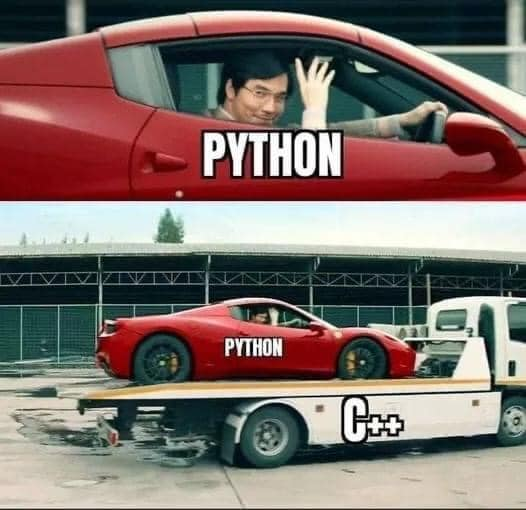

In [7]:
img=Image(url_github_repo+'jupyter/jupyterNotebooks/images/pythoncpp.jpg',width=800)
display(img)

## Install and import the NumPy module
The first time you run this notebook you might have to install numpyPandas using the following script:

In [8]:
#%pip install --upgrade pip
%pip install numpy

#import sys
#!"{sys.executable}" -m pip install --upgrade pip
#!"{sys.executable}" -m pip install numpy

Note: you may need to restart the kernel to use updated packages.


After installing a module (only once), you should import it (everytime)
- The Python community has adopted a number of __naming conventions__ for commonly used modules:
* Below you see the conventions for numpy, pandas and matplotlib

In [9]:
import numpy as np
# import pandas as pd 
# import matplotlib.pyplot as plt

* This means that when you see `np.arange(4)`, we refer to `numpy.arange(4)`, the `arange` function in NumPy.

## Main features: Arrays, Vectorized Computation, Broadcast

Numpy provides:
* __ndarray__, a multidimensional array providing **vectorized arithmetic** operations and **broadcasting** capabilities
   * Vectorized arithmetic operations: 
     - Operations on arrays are done 
       - element-wise iterating over the elements of the arrays 
       - _at C level rather than at Python level_, obtaining better performances. 
     - We get a concise syntax
   * [Broadcasting](https://numpy.org/doc/stable/user/basics.broadcasting.html): 
     - In general, operations on arrays should be done on arrays with same _dimensions_
     - In certain cases, operations on arrays can be done even if they do not have same dimensions. Pyhton tries to guess what to do
     - E.g., if you multiply an array by a constant, each entry of the arrays is multiplied by the constant
       - the constant is `broadcasted` on each entry of the array
     - No data is 'needlessly' copied, and the _iterations to broadcast_  are done at C level, obtaining better performances
* Standard mathematical functions for applying operations on entire arrays without having to write loops
  - Again, these guarantee C-level performances

## The NumPy ndarray: A Multidimensional Array

### Performance comparison Numpy ndarrays vs Python lists

In [10]:
l=[1,2,3]
l

[1, 2, 3]

Let's create a ndarray and a built-in Python list, each with 5mln elements.

In [11]:
import numpy as np
np_arr = np.arange(5000000) #5 mln
py_list = list(range(5000000)) #5 mln

print('np_arr has type',type(np_arr))
print('py_list has type',type(py_list))
np_arr
#py_list

np_arr has type <class 'numpy.ndarray'>
py_list has type <class 'list'>


array([      0,       1,       2, ..., 4999997, 4999998, 4999999],
      shape=(5000000,))

Let's compute the square value of each element in the array/list

In [12]:
 print("Test NumPy Array")
 %time np_arr_power = np_arr ** 2

 print("\nTest Python list comprehension")
 %time py_list = [x ** 2 for x in py_list]

 print("\nTest Python list iteration")
 %time for i in range(len(py_list)): py_list[i]=py_list[i]**2

 print("\nTests completed")

Test NumPy Array
CPU times: user 3.33 ms, sys: 5.39 ms, total: 8.72 ms
Wall time: 8.74 ms

Test Python list comprehension
CPU times: user 96.1 ms, sys: 28.6 ms, total: 125 ms
Wall time: 125 ms

Test Python list iteration
CPU times: user 270 ms, sys: 23.2 ms, total: 293 ms
Wall time: 293 ms

Tests completed


### What is an ndarray?

NumPy arrays are named **nd**array because they are **n**-**d**imensional arrays

In [13]:
#We have already imported numpy in a cell above
#import numpy as np

# Generate a 2x3 matrix with random data in the interval [0,1)
data = np.random.rand(2, 3)
data

array([[0.66841414, 0.72890724, 0.95235783],
       [0.76142871, 0.16376437, 0.23527176]])

In [14]:
data.shape

(2, 3)

Arrays enable you to perform
mathematical operations on each of their elements 
* using a syntax similar to the equivalent operations between (scalar) numbers

Below we 
* multiply by 10 **each value** in `data`
* double **each value** in `data`

In [15]:
data * 10

array([[6.68414139, 7.28907239, 9.52357828],
       [7.6142871 , 1.63764366, 2.3527176 ]])

In [16]:
data + data

array([[1.33682828, 1.45781448, 1.90471566],
       [1.52285742, 0.32752873, 0.47054352]])

A difference between Python lists and arrays
* lists can contain elements of **different type**
* arrays have to contain only elements of **same type**

Every array has 
* a`shape`, a tuple indicating the size of each dimension, 
  * `data.shape` is `(2,3)` because it has dimension 2x3
* a `dtype`, an object describing the type of the data in the array
  * `data.dtype` is `float64` because it contains floating point numbers (reals)
  *  Note that `float64` is a [data type defined in NumPy](https://numpy.org/doc/stable/user/basics.types.html). _More on this later_

In [17]:
print(data.shape)
print(data.dtype)

(2, 3)
float64


### Creating ndarrays
The easiest way to create an array is to use the `array` function. 
* This will produce a new array containing the provided data

In [18]:
data1 = [6, 7.5, 8, 0, 1]
print(data1)
arr1 = np.array(data1)
print(arr1)
print(arr1.shape)
print(arr1.dtype)

[6, 7.5, 8, 0, 1]
[6.  7.5 8.  0.  1. ]
(5,)
float64


__Why do we get `6.` and not `6`?__

In [19]:
l_str=['1','2']
arr_str=np.array(l_str)
print(arr_str)
arr_int=arr_str.astype(np.int32)
print(arr_int)

['1' '2']
[1 2]


List of lists, e.g. representing a matrix,
* can be converted into a multidimensional array 
* if internal lists have same length

In [20]:
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]
print('data2\n',data2)
arr2 = np.array(data2)
print('arr2\n',arr2)
print(arr2.shape)
print(arr2.dtype)

data2
 [[1, 2, 3, 4], [5, 6, 7, 8]]
arr2
 [[1 2 3 4]
 [5 6 7 8]]
(2, 4)
int64


Further functions for creating new arrays:
* `zeros` and `ones` create arrays of 0’s or 1’s, respectively, with a given length or shape.
* To create a higher dimensional array with these methods, pass a tuple for the shape:

In [21]:
print('np.zeros(10) =', np.zeros(10))
print('np.ones((3, 6)) =\n', np.ones((3, 6)))

np.zeros(10) = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
np.ones((3, 6)) =
 [[1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]]


`arange` is an array-valued version of the built-in Python `range` function:
* It allows to represent an open interval [start,stop,step)
    - where only stop is mandatory
    - `stop` does not belong to the range
* Beware: 
  - `range` is an iterator that creates elements on demand
  - `arange` fully creates the array allocating all the necessary space
     - while python's `range` does not occupy much space

In [22]:
np.ones((3, 6))

array([[1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.]])

In [23]:
np.ones((3, 6)) + 1

array([[2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2.]])

In [24]:
print(np.arange(15))  #if you want integers
print(np.arange(15.)) #if you want reals
print(type(np.arange(15)))

print(range(15))
print(type(range(15)))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14.]
<class 'numpy.ndarray'>
range(0, 15)
<class 'range'>


In [25]:
np.arange(10,20,2)

array([10, 12, 14, 16, 18])

### Data Types for ndarrays
The names of the numerical dtypes follow this convention: 
* A type name, like `float` or `int`, followed by the number of bits used to represent an element of this type.
* The higher is this number of bits, 
  * the higher precision (or the larger interval) you can use to store your data (GOOD)
  * the more memory is required to store your data (BAD)

For example, 
* a double-precision floating point value takes 64 bits (`float64`)
* an integer might take 32 (`int32`) or 64 bits (`int64`)
  * in the latter case being able to represent a larger interval of integers, but using up more space

In [26]:
arr1 = np.array([1, 2, 3], dtype=np.float64)
print(arr1)
arr2 = np.array([1.1, 2.1, 3.1], dtype=np.int32)
print(arr2)
print(arr1.dtype)
print(arr2.dtype)

[1. 2. 3.]
[1 2 3]
float64
int32


You can explicitly convert or cast an array from one dtype to another using ndarray’s `astype` method
* This will create a `copy` of the original array, where elements have the new type

In [27]:
arr = np.array([1.1, 2.1, 3.1, 4.1, 5.1])
print(arr)
print('Before',arr.dtype,'\n')
int_arr = arr.astype(np.int32)
print(int_arr)
print('After ',int_arr.dtype)

[1.1 2.1 3.1 4.1 5.1]
Before float64 

[1 2 3 4 5]
After  int32


### Vectorized Arithmetics with NumPy Arrays

Once you have values in an array
* You can easily apply operations on each of its elements
  * Arithmetic operations between equal-size arrays are applied element-wise
  * Arithmetic operations between an array and a scalar (a number):
    * the operation is applied between each array element and the scalar
    * the scalar is said to be _broadcasted_ to all the array elements
* Similarly to list comprehensions, this does not require loops,
  * Note: as shown above, vectorized arithmetics is more efficient than the corresponding list comprehension operation (even more if compared to loops)

In [28]:
a = np.array([[1., 2., 3.], [4., 5., 6.]])
print('a = \n',a, '\n')
print('a * a = \n', a * a, '\n')
print('a - a = \n', a - a, '\n')
print('1 / a = \n', 1 / a, '\n')
print('a*0.5  \n=', a*0.5, '\n')
print('a**0.5  \n=', a**0.5, '\n')

a = 
 [[1. 2. 3.]
 [4. 5. 6.]] 

a * a = 
 [[ 1.  4.  9.]
 [16. 25. 36.]] 

a - a = 
 [[0. 0. 0.]
 [0. 0. 0.]] 

1 / a = 
 [[1.         0.5        0.33333333]
 [0.25       0.2        0.16666667]] 

a*0.5  
= [[0.5 1.  1.5]
 [2.  2.5 3. ]] 

a**0.5  
= [[1.         1.41421356 1.73205081]
 [2.         2.23606798 2.44948974]] 



> Note that with `a * a` we do not compute the product of 2 matrices. 
> - We multiply them element-wise

### Basic Indexing and Slicing

#### Indexing and slicing 1-dimensional arrays

Arrays have `indexing` and `slicing` capabilities of lists

In [29]:
arr = np.arange(10)
print('arr',arr)
print('You can indexsingle entries:\narr[0] is',arr[0])
print('arr[5] is',arr[5])

arr [0 1 2 3 4 5 6 7 8 9]
You can indexsingle entries:
arr[0] is 0
arr[5] is 5


In [30]:
print('arr\n',arr)
print('You can create slices:')
print('arr[:8]  is\n',arr[:8])
print('arr[5:]  is\n          ',arr[5:])
print('arr[5:8] is\n          ',arr[5:8])
view58=arr[5:8]
view58

arr
 [0 1 2 3 4 5 6 7 8 9]
You can create slices:
arr[:8]  is
 [0 1 2 3 4 5 6 7]
arr[5:]  is
           [5 6 7 8 9]
arr[5:8] is
           [5 6 7]


array([5, 6, 7])

A slice is a sort of `view` of the array
* You can assign it to a variable
* You can change its values
  - The original array is changed as well!
* **Beware**: no data is copied

In [31]:
arr[5:8] = 12
print('After arr[5:8] = 12 arr is\n',arr)

After arr[5:8] = 12 arr is
 [ 0  1  2  3  4 12 12 12  8  9]


Note: 
* if you assign a scalar value to a __slice__ (a selection of some elements in an array)
  * as in `arr[5:8] = 12`
* then the value is propagated (or, again, _broadcasted_) to each selected element 

If you are familiar with Python lists you might have noticed an important difference
* When slicing a list, you actually create a copy 
* **Array slices are views on the original array**.
* The __data in a slice is not copied__
  * this is more efficient
  * and any modifications to the view will be reflected in the source array
  
Let's see another example  

In [32]:
print('source array', arr)
arr_slice = arr[5:8]
print('slice array', arr_slice)

source array [ 0  1  2  3  4 12 12 12  8  9]
slice array [12 12 12]


In [33]:
arr_slice[1] = 12345
print('source array (after arr_slice[1] = 12345):\n', arr)

source array (after arr_slice[1] = 12345):
 [    0     1     2     3     4    12 12345    12     8     9]


If you want a `copy of a slice of an ndarray` instead of a view, you will need to `explicitly copy` the array; 
* `arr2 = arr[5:8].copy()`

#### Indexing and slicing higher-dimensional arrays

With higher dimensional arrays, you have many more options. 
* A two-dimensional array is actually an array of arrays
  * Each entry of the _outer_ array contains an _inner_ array

In [34]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [35]:
arr1d=arr2d[0]
arr1d

array([1, 2, 3])

In [36]:
arr1d[2]

np.int64(3)

As for multidimensional lists, you can access single elements of inner arrays using nested `[]`
* `arr2d[0][2]` is `3`, the third element (index `2`) of the first inner array (index `0`)
* Alternatively, you can do `arr2d[0,2]`

In [37]:
print(arr2d)
print(arr2d[0][2])
print(arr2d[0, 2])

[[1 2 3]
 [4 5 6]
 [7 8 9]]
3
3


**See figure below for an illustration of indexing a 2D array** <br />
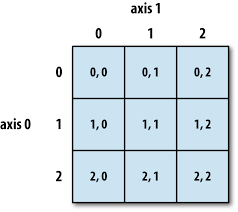

This is an example for 2-dimensional arrays
* It works similarly for higher dimensions...

**BEWARE**
- When __indexing__, it does not make a difference whether you use
  - `arr2d[0][2]` or `arr2d[0, 2]`
- When __silicing__, it makes a **big difference** whether you use
  - `arr2d[:2,1:]` or `arr2d[:2][1:]`
  - Typically what you want to do is `arr2d[:2,1:]`

For `arr2d[:2,1:]`
- we first select the rows 0 and 1 `[1,2,3],[4,5,6]`
- from these, we select column 1 and 2 `[2,3],[5,6]`

In [38]:
print(arr2d[:2,1:])
arr2d[:2,1:].shape

[[2 3]
 [5 6]]


(2, 2)

For `arr2d[:2][1:]`
- we first select the rows 0 and 1 `[1,2,3],[4,5,6]`
- we select row 1 `[4, 5, 6]`

In [39]:
print(arr2d[:2])
print()
print(arr2d[:2][1:])
arr2d[:2][1:].shape

[[1 2 3]
 [4 5 6]]

[[4 5 6]]


(1, 3)

Further examples of indexing/slicing of higher dimensional arrays

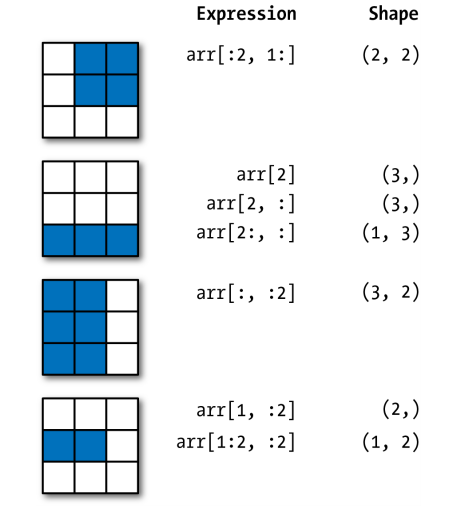

In [40]:
print(arr2d)
print()
print(arr2d[:2])

[[1 2 3]
 [4 5 6]
 [7 8 9]]

[[1 2 3]
 [4 5 6]]


We have sliced it along axis 0, the first axis (the rows). 
* A slice, therefore, selects a range of elements along an axis. 
* You can pass multiple slices just like you can pass multiple indexes

In [41]:
arr2d[:2, 1:]

array([[2, 3],
       [5, 6]])

Assigning to a slice expression assigns to the whole selection by broadcasting

In [42]:
arr2d[:2, 1:] = 0 
arr2d

array([[1, 0, 0],
       [4, 0, 0],
       [7, 8, 9]])

### Select entries that satisfy a guard

We can also use a Boolean expression to select elements in an array
* we select the ones satisfying the Boolean expression

In [43]:
data = np.random.randn(7, 4)
print('Data\n',data)

Data
 [[-0.24409788 -0.14702243  1.83842972  0.32714686]
 [-0.36750081 -0.25743523  0.05547684 -0.15812017]
 [ 0.39953486  0.06125929  0.48264971 -1.4349891 ]
 [ 0.45726123  0.15954758  0.58395228  0.81972601]
 [ 0.76613876 -0.77527081  1.13016175  0.45620524]
 [ 0.12548258  0.08774061 -1.27329811 -0.57172768]
 [-0.82250529  1.65269846  0.32566739  0.48668279]]


We first see how to create a _mask_

In [44]:
data > 0

array([[False, False,  True,  True],
       [False, False,  True, False],
       [ True,  True,  True, False],
       [ True,  True,  True,  True],
       [ True, False,  True,  True],
       [ True,  True, False, False],
       [False,  True,  True,  True]])

Now we use the mask to access the entries of interest

In [45]:
data2 = data[ data > 0 ]
print('Data2\n',data2)
data2.shape

Data2
 [1.83842972 0.32714686 0.05547684 0.39953486 0.06125929 0.48264971
 0.45726123 0.15954758 0.58395228 0.81972601 0.76613876 1.13016175
 0.45620524 0.12548258 0.08774061 1.65269846 0.32566739 0.48668279]


(18,)

> This will actually _copy_ your data
> - You get a __new 1-dimensional array__ containing the elements matching the condition

In [46]:
data2[0]=100
data

array([[-0.24409788, -0.14702243,  1.83842972,  0.32714686],
       [-0.36750081, -0.25743523,  0.05547684, -0.15812017],
       [ 0.39953486,  0.06125929,  0.48264971, -1.4349891 ],
       [ 0.45726123,  0.15954758,  0.58395228,  0.81972601],
       [ 0.76613876, -0.77527081,  1.13016175,  0.45620524],
       [ 0.12548258,  0.08774061, -1.27329811, -0.57172768],
       [-0.82250529,  1.65269846,  0.32566739,  0.48668279]])

How can I get elements within an interval?
- Or, in general, that satisfy a complex condition?

In [47]:
(data > 0) & (data < 0.5)

array([[False, False, False,  True],
       [False, False,  True, False],
       [ True,  True,  True, False],
       [ True,  True, False, False],
       [False, False, False,  True],
       [ True,  True, False, False],
       [False, False,  True,  True]])

In [48]:
data3=data[ (data > 0) & (data < 0.5) ]
print('Data3\n',data3)
data3.shape

Data3
 [0.32714686 0.05547684 0.39953486 0.06125929 0.48264971 0.45726123
 0.15954758 0.45620524 0.12548258 0.08774061 0.32566739 0.48668279]


(12,)

## Mathematical and Statistical Methods
Arrays have a number of methods for 
* computing mathematical functions/statistics 
  * on the entire array 
  * on part of the array

### Reshaping an array

Arrays have a convenient method `reshape` to 
* change their dimensions without modifying the data
* Also in this case we compute views. 
  * **no data is actually copied**
  * any change to the view is observed also in the orginal data

For example, we can transform
* a 1-dimensional array with 15 entries
* into a 2-dimensional 3x5 array (a matrix)

In [49]:
arr = np.arange(15)
print("1-dimensional array arr\n",arr)
m=arr.reshape((3, 5))
print("2-dimensional matrix m\n",m)

print()
#m is a view!
m[0,0]=100
print("1-dimensional array arr after modifiyng the view m\n",arr)
print("2-dimensional matrix m after modifiyng the view m\n",m)

1-dimensional array arr
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
2-dimensional matrix m
 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]

1-dimensional array arr after modifiyng the view m
 [100   1   2   3   4   5   6   7   8   9  10  11  12  13  14]
2-dimensional matrix m after modifiyng the view m
 [[100   1   2   3   4]
 [  5   6   7   8   9]
 [ 10  11  12  13  14]]


### Transposing Arrays
Arrays have the transpose method and also the special `T` attribute
* This is just a special reshape
* we compute a view - no actual copy

In [50]:
arr = np.arange(15)
m = arr.reshape(3,5)
print("Matrix m\n",m)
print()
print("Transposed matrix using T\n",m.T)
print()
print("Transposed matrix transpose()\n",m.transpose())

Matrix m
 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]

Transposed matrix using T
 [[ 0  5 10]
 [ 1  6 11]
 [ 2  7 12]
 [ 3  8 13]
 [ 4  9 14]]

Transposed matrix transpose()
 [[ 0  5 10]
 [ 1  6 11]
 [ 2  7 12]
 [ 3  8 13]
 [ 4  9 14]]


When invoked on a matrix, they both give the transpose of such matrix
- See animation from [wikipedia](https://en.wikipedia.org/wiki/Transpose)

Image taken from
https://upload.wikimedia.org/wikipedia/commons/e/e4/Matrix_transpose.gif


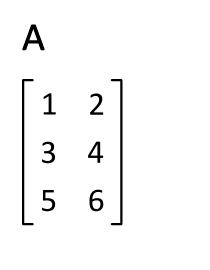

In [51]:
from IPython.display import Image
print("Image taken from")
print("https://upload.wikimedia.org/wikipedia/commons/e/e4/Matrix_transpose.gif")
img=Image(url_github_repo+'jupyter/jupyterNotebooks/images/Matrix_transpose.gif',width=600)
display(img)

In addition, `transpose` can be invoked on arrays of any dimensions [to permute such dimensions](https://numpy.org/devdocs/reference/generated/numpy.transpose.html#numpy.transpose)
- reversing them by default
- or providing the new order for dimensions in input

In [52]:
x = np.ones((2, 3, 4))
print(x)
print('\nThe 3-D matrix has shape \n',x.shape)
print('Shape of x.transpose()\n',x.transpose().shape)
print('Shape of x.transpose(0,2,1)\n',x.transpose(0,2,1).shape)

[[[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]

 [[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]]

The 3-D matrix has shape 
 (2, 3, 4)
Shape of x.transpose()
 (4, 3, 2)
Shape of x.transpose(0,2,1)
 (2, 4, 3)


### Matrix product
If you want to [multply two matrices](https://en.wikipedia.org/wiki/Matrix_multiplication) you can use the `dot` method
* not just multiplying element-wise their elements
* but the classic row-column multiplication of matrixes

In [53]:
m1 = np.arange(4).reshape(2,2)
m2 = (np.arange(4)+4).reshape(2,2)
#np.dot(m.T,m)
print('m1\n',m1)
print('m2\n',m2)
print('m1.dot(m2)\n',m1.dot(m2))
print('Same as np.dot(m1,m2)\n',np.dot(m1,m2))

m1
 [[0 1]
 [2 3]]
m2
 [[4 5]
 [6 7]]
m1.dot(m2)
 [[ 6  7]
 [26 31]]
Same as np.dot(m1,m2)
 [[ 6  7]
 [26 31]]


In [54]:
m1 = np.arange(4).reshape(2,2)
m1

array([[0, 1],
       [2, 3]])

In [55]:
m2 = (np.arange(4)+4).reshape(2,2)
m2

array([[4, 5],
       [6, 7]])

### Square root
_np.sqrt()_ computes the square root of each element. Equivalent to m1 ** 0.5

In [56]:
print(np.sqrt(m1))
print(m1 ** 0.5)

[[0.         1.        ]
 [1.41421356 1.73205081]]
[[0.         1.        ]
 [1.41421356 1.73205081]]


### Aggregations
Aggregations (often called reductions) 
* like sum, mean, and standard deviation std of all elements in the matrix/array 
* can be computed by using the corresponding array method

In [57]:
print(m.shape)
m

(3, 5)


array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [58]:
print('matrix\n',m)
print('mean',m.mean())
print('sum',m.sum())
print('standard deviation',m.std())

print()
print('array\n',arr)
print('mean',arr.mean())
print('sum',arr.sum())
print('standard deviation',arr.std())

matrix
 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
mean 7.0
sum 105
standard deviation 4.320493798938574

array
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
mean 7.0
sum 105
standard deviation 4.320493798938574


Functions like `sum`  and `mean`
* can be computed for each dimension rather than cumulatively 
* we do this specifying the `axis` (the dimension) over which we want to iterate

For example, using 
* `axis=0` we compute the sum/mean/std for each column of M
* `axis=1` we compute the sum/mean/std for each row of M

In [59]:
print('matrix\n',m)
print()

print('sum of each column\n',m.sum(axis=0))
print('mean of each column\n',m.mean(axis=0))
print('standard deviation of each column\n',m.std(axis=0))
print()

print('sum of each row\n',m.sum(axis=1))
print('mean of each row\n',m.mean(axis=1))
print('standard deviation of each row\n',m.std(axis=1))

matrix
 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]

sum of each column
 [15 18 21 24 27]
mean of each column
 [5. 6. 7. 8. 9.]
standard deviation of each column
 [4.0824829 4.0824829 4.0824829 4.0824829 4.0824829]

sum of each row
 [10 35 60]
mean of each row
 [ 2.  7. 12.]
standard deviation of each row
 [1.41421356 1.41421356 1.41421356]


### Sorting
Similarly to lists, 
* arrays can be sorted using the `sort()` method

In [60]:
#Sample from the normal distribution
arr = np.random.randn(8)
arr

array([-0.95624375,  0.08136197,  0.7653518 , -2.06318663,  0.03202938,
        0.14078664,  0.25620051, -0.7672497 ])

In [61]:
arr.sort()
arr

array([-2.06318663, -0.95624375, -0.7672497 ,  0.03202938,  0.08136197,
        0.14078664,  0.25620051,  0.7653518 ])

Multidimensional arrays are sorted for one chosen dimension
E.g. in matrices we can
* Sort across rows
* Sort across columns

In [62]:
arr2d = np.random.randn(5, 3)
arr2d_cp0 = arr2d.copy()
arr2d_cp1 = arr2d.copy()

print('Original')
print(arr2d)

print('\n`sort(0)`: Sort the elements within each column (sort across rows)')
arr2d_cp0.sort(axis=0)
print('arr2d.sort(0)')
print(arr2d_cp0)

print('\n`sort(1)`: Sort the elements within each row (sort across columns)')
arr2d_cp1.sort(1)
print('arr2d.sort(1)')
print(arr2d_cp1)

print('\n`sort( )`: Sorts across last axis  ( sort(1), sort across columns)')
arr2d.sort()
print('arr2d.sort()')
print(arr2d)

Original
[[ 0.32572349  0.47375452  1.23453366]
 [-0.6758532   0.87578996 -1.02583702]
 [ 1.21391161  0.11215509  1.6151498 ]
 [ 0.66733271  1.81107141  0.26553444]
 [ 0.38418828  1.13442976 -1.79696697]]

`sort(0)`: Sort the elements within each column (sort across rows)
arr2d.sort(0)
[[-0.6758532   0.11215509 -1.79696697]
 [ 0.32572349  0.47375452 -1.02583702]
 [ 0.38418828  0.87578996  0.26553444]
 [ 0.66733271  1.13442976  1.23453366]
 [ 1.21391161  1.81107141  1.6151498 ]]

`sort(1)`: Sort the elements within each row (sort across columns)
arr2d.sort(1)
[[ 0.32572349  0.47375452  1.23453366]
 [-1.02583702 -0.6758532   0.87578996]
 [ 0.11215509  1.21391161  1.6151498 ]
 [ 0.26553444  0.66733271  1.81107141]
 [-1.79696697  0.38418828  1.13442976]]

`sort( )`: Sorts across last axis  ( sort(1), sort across columns)
arr2d.sort()
[[ 0.32572349  0.47375452  1.23453366]
 [-1.02583702 -0.6758532   0.87578996]
 [ 0.11215509  1.21391161  1.6151498 ]
 [ 0.26553444  0.66733271  1.81107141]
 [

### Unique
NumPy has some basic set operations for 1-dimensional ndarrays. 
* The most common one is `np.unique()` 
  * returns the sorted unique values in an array

In [63]:
names = np.array(['Bob', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
print(np.unique(names))

# pure Python alternative:
# sorted(set(names))

['Bob' 'Joe' 'Will']


## Logic functions
- See also [here](https://numpy.org/doc/stable/reference/routines.logic.html)

We have seen how conditions can be checked on all elements in an array
- obtaining an array of same dimensions containing 
  - `True` for the elements satisfying the condition
  - `False` for the elements not satisfying the condition  

In [64]:
data = np.random.randn(7, 4)
data

array([[-1.27597678e-01,  4.21413092e-01, -1.75282910e-01,
        -1.46412802e+00],
       [-1.51137760e-03, -3.97993814e-01,  9.08033176e-01,
         2.97358972e-01],
       [-5.17806463e-01,  2.50040123e-01, -1.34494591e+00,
        -7.29704395e-01],
       [ 1.07386395e+00,  1.98399936e-01, -5.18442490e-01,
        -2.66554293e+00],
       [-4.78644848e-01, -1.95503518e-01,  3.12085545e-01,
        -2.39246633e-01],
       [ 2.09798116e-01,  1.36281904e+00,  2.07880122e-02,
        -2.48473728e-01],
       [ 4.05778263e-01, -6.40532340e-01, -1.61006611e-01,
        -1.43134756e+00]])

What numbers are greater than 0?

In [65]:
mask = data > 0
print(mask.dtype)
print(mask.shape)
mask

bool
(7, 4)


array([[False,  True, False, False],
       [False, False,  True,  True],
       [False,  True, False, False],
       [ True,  True, False, False],
       [False, False,  True, False],
       [ True,  True,  True, False],
       [ True, False, False, False]])

NumPy offers __logic functions__ to check Boolean expressions on such Boolean arrays
- `any`: a generalization of **OR** returning `True` if at least one entry contains `True` 
- `all`: a generalization of **AND** returning `True` if at least one entry contains `True` 

As for the aggregation functions, these can be checked also on single dimensions

In [66]:
print(mask)
print()
print()

# any( axis)
# Test whether any array element along a given axis evaluates to True.
print('\nmask.any()\n', mask.any() )
print('\nmask.any(axis=0) - for each column\n', mask.any(axis=0) )
print('\nmask.any(axis=1) - for each row\n', mask.any(axis=1) )
#all(axis)

print()
print()
#Test whether all array elements along a given axis evaluate to True.
print('\nmask.all()\n', mask.all() )
print('\nmask.all(axis=0) - for each column\n', mask.all(axis=0) )
print('\nmask.all(axis=1) - for each row\n', mask.all(axis=1) )

[[False  True False False]
 [False False  True  True]
 [False  True False False]
 [ True  True False False]
 [False False  True False]
 [ True  True  True False]
 [ True False False False]]



mask.any()
 True

mask.any(axis=0) - for each column
 [ True  True  True  True]

mask.any(axis=1) - for each row
 [ True  True  True  True  True  True  True]



mask.all()
 False

mask.all(axis=0) - for each column
 [False False False False]

mask.all(axis=1) - for each row
 [False False False False False False False]


# Pandas

[Pandas](https://pandas.pydata.org/) is another popular Python package. 
* It is built on top of NumPy (its data structures consist of several arrays)

Pandas provides rich data structures and functions designed to 
* make it easy, flexible and efficient working with tabular data 
  - CSV files
  - Spreadsheets
  - Databases

E.g., Pandas allows to easily perform complex data manipulation on multi-dimensional data like 
* _reshape_ and _slice_
* data aggregations 
* data selection
* merge/join tables

## Install and import the Pandas module

The first time you run this notebook you might have to install Pandas using the following script:

In [67]:
%pip install pandas

#import sys
#!"{sys.executable}" -m pip install pandas

Note: you may need to restart the kernel to use updated packages.


The Python community has adopted a number of __naming conventions__ for commonly used modules:
* Below you see the conventions for numpy, pandas and matplotlib

In [68]:
#import numpy as np
import pandas as pd
# import matplotlib.pyplot as plt

## Series

A Series is a one-dimensional list-like/array-like object containing __2 arrays__
* an ndarray containing the __actual data__
* an associated ndarray of __labels__ with one label (or index) per data element

Intuitively, you can see a Series as 
* a dictionary (a hash-map)
* or, in its simplest form, as a 1-dimensional array/list consisting of
  * an array of data, 
  * an implicit array of labels. It labels each element with its position

In [69]:
obj = pd.Series([4, 7, -5, 3])
obj

0    4
1    7
2   -5
3    3
dtype: int64

We note that 
* The string representation of a Series shows the index on the left and the values on the right
  * Obtained using the method `__str__` of the class Series


Since we did not specify an index
* a default array of labels containing integers from 0 to N - 1 is created.
* each element is labeled with its own position in the array

If you are interested only in one of the two arrays, just use

In [70]:
print('Series index: ',obj.index)
print('Series values: ',obj.values)

Series index:  RangeIndex(start=0, stop=4, step=1)
Series values:  [ 4  7 -5  3]


Let's now create a Series whose entries are labelled by characters.

In [71]:
obj2 = pd.Series([4, 7, -5, 3], index=['d', 'b', 'a', 'c'])
obj2

d    4
b    7
a   -5
c    3
dtype: int64

In [72]:
obj2['d']

np.int64(4)

### Indexing, selection, and filtering

Similarly to Python [**dict**ionaries](https://docs.python.org/3/tutorial/datastructures.html), 
* you can use values in the index to select values in the main array

In [73]:
print("obj2['d'] = \n",obj2['d'])

obj2['d'] = 6
print("obj2['d']  (after obj2['d'] = 6) =\n",obj2['d'])

print('\nYou can also select a number of entries')
print("obj2[['c', 'a', 'd']] =")
print(obj2[ ['c', 'a', 'd'] ])

obj2['d'] = 
 4
obj2['d']  (after obj2['d'] = 6) =
 6

You can also select a number of entries
obj2[['c', 'a', 'd']] =
c    3
a   -5
d    6
dtype: int64


Indexes are preserved by NumPy array operations like
* filtering with a boolean array, scalar multiplication, application of math functions

What do you get with `obj2 > 0`?
- a copy of the series preserving the index, with `True`/`False` values

In [74]:
obj2

d    6
b    7
a   -5
c    3
dtype: int64

In [75]:
obj2 > 0

d     True
b     True
a    False
c     True
dtype: bool

In [76]:
print("obj2")
print(obj2)
print()
print("NumPy operation obj2[obj2 > 0]")
print(obj2[obj2 > 0])
print()
print("NumPy operation obj2 * 2")
print(obj2 * 2)
print()
print("NumPy operation np.exp(obj2)")
print(np.exp(obj2))

obj2
d    6
b    7
a   -5
c    3
dtype: int64

NumPy operation obj2[obj2 > 0]
d    6
b    7
c    3
dtype: int64

NumPy operation obj2 * 2
d    12
b    14
a   -10
c     6
dtype: int64

NumPy operation np.exp(obj2)
d     403.428793
b    1096.633158
a       0.006738
c      20.085537
dtype: float64


### Create a series, and NaN

You can create a Series using 
- a **dict**ionary 

In [77]:
sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}
obj4 = pd.Series(sdata)
obj4

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

If you are interested in specific indexes, you can use
- a **dict**ionary 
- and a list as indexes of interest

In [78]:
sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}
states = ['California', 'Ohio', 'Oregon', 'Texas']
#states = ['Ohio', 'Oregon', 'Texas']
obj4 = pd.Series(sdata, index=states)
obj4 

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

We note that
* 3 values found in sdata were placed in the appropriate locations, 
* but since no value for `'California'` was found, it got a `NaN` (not a number) 
  * which is considered in pandas to mark missing/NA/NaN values
  
The `isnull` and `notnull` functions in pandas detect such missing values:
- They make a mask!

In [79]:
pd.isnull(obj4) 

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

In [80]:
pd.notnull(obj4) 

California    False
Ohio           True
Oregon         True
Texas          True
dtype: bool

E.g., if you want to use only the non-null values you do:

In [81]:
obj4[pd.notnull(obj4)]

Ohio      35000.0
Oregon    16000.0
Texas     71000.0
dtype: float64

## DataFrame
* A **Series** can be seen as 
  - a table with 1 column
  - a csv file with 1 column
  - an excel file with 1 column
  - ...
* A **DataFrame is a proper table/csv** with more columns
  * A Series is just a simpler version of a dataframe
  * A DataFrame is a series with 
    - **more main arrays** (one per column), and 
    - **one index**
  * DataFrames are the most important objects in pandas

### Creating DataFrame objects

The most common way to build a dataframe is by 
* using a dict containing lists or arrays of same length
  * each key/label becomes a column
    * if you specify a subset of key/labels, then only the corresponding column will be added
    * if you pass a column that isn’t contained in data, it will get NA values
  * each list/array element is a value for that column

Essentially we _transpose_ the dictionary

In [82]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
        'year': [2000, 2001, 2002, 2001, 2002, 2003],
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}
data

{'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
 'year': [2000, 2001, 2002, 2001, 2002, 2003],
 'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}

In [83]:
frame = pd.DataFrame(data)
frame

state  year  pop
0    Ohio  2000  1.5
1    Ohio  2001  1.7
2    Ohio  2002  3.6
3  Nevada  2001  2.4
4  Nevada  2002  2.9
5  Nevada  2003  3.2

In [84]:
frame = pd.DataFrame(data,columns=['state','pop','nonExistingColumn'])
frame

state  pop nonExistingColumn
0    Ohio  1.5               NaN
1    Ohio  1.7               NaN
2    Ohio  3.6               NaN
3  Nevada  2.4               NaN
4  Nevada  2.9               NaN
5  Nevada  3.2               NaN

In [85]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   state              6 non-null      object 
 1   pop                6 non-null      float64
 2   nonExistingColumn  0 non-null      object 
dtypes: float64(1), object(2)
memory usage: 276.0+ bytes


If we don't specify columns of interest we load all of them

In [86]:
data

{'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
 'year': [2000, 2001, 2002, 2001, 2002, 2003],
 'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}

In [87]:
frame = pd.DataFrame(data)
frame

state  year  pop
0    Ohio  2000  1.5
1    Ohio  2001  1.7
2    Ohio  2002  3.6
3  Nevada  2001  2.4
4  Nevada  2002  2.9
5  Nevada  2003  3.2

In [88]:
"""
Cell generated by Data Wrangler.
"""
def clean_data(frame):
    # Double the values in column 'pop'
    frame['pop'] = frame['pop'] * 2
    return frame

frame_clean = clean_data(frame.copy())
frame_clean.head()

state  year  pop
0    Ohio  2000  3.0
1    Ohio  2001  3.4
2    Ohio  2002  7.2
3  Nevada  2001  4.8
4  Nevada  2002  5.8

We see above that the DataFrame also has an index/labels array
* the first column
  * in this case we have the default array of labels
  * but specific ones can be given explicitly

In [89]:
#frame1 = pd.DataFrame(data, index = ['a','b','c','d','e','f'] )
frame1 = pd.DataFrame(data, index = ['o1','o2','o3','n1','n2','n3'] )
frame1

state  year  pop
o1    Ohio  2000  1.5
o2    Ohio  2001  1.7
o3    Ohio  2002  3.6
n1  Nevada  2001  2.4
n2  Nevada  2002  2.9
n3  Nevada  2003  3.2

A column of a DataFrame can be retrieved, obtaining a Series 
* by dict-like notation 
* or by attribute:

In [90]:
frame2 = pd.DataFrame(data, columns=['year', 'state', 'pop', 'debt'], 
                      index=['one', 'two', 'three', 'four', 'five','six'])
frame2

year   state  pop debt
one    2000    Ohio  1.5  NaN
two    2001    Ohio  1.7  NaN
three  2002    Ohio  3.6  NaN
four   2001  Nevada  2.4  NaN
five   2002  Nevada  2.9  NaN
six    2003  Nevada  3.2  NaN

In [91]:
#Select single column or sequence of columns from the DataFrame
frame2['state'] # by dict-like notation 

one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
six      Nevada
Name: state, dtype: object

In [92]:
frame2.state # by attribute

one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
six      Nevada
Name: state, dtype: object

> Note the difference
> - `['state']` vs `.state`
<br/>
> They are both valid

If you create a dataframe using a 2-levels nested dictionary
* The keys of the outer dictionary will be used for the column names
* The keys of the inner dictionary will be used for the index names

In [93]:
inner_dict1 ={           2001: 2.4, 2002: 2.9}
inner_dict2 ={2000: 1.5, 2001: 1.7, 2002: 3.6}

outer_dict = {'Nevada': inner_dict1, 'Ohio': inner_dict2}
frame3 = pd.DataFrame(outer_dict)
frame3

Nevada  Ohio
2001     2.4   1.7
2002     2.9   3.6
2000     NaN   1.5

You can also choose which keys of the inner dict (i.e. which indexes) to use
* we are not using 2001 and 2000
* we are using a non-existing index 2003

In [94]:
pd.DataFrame(outer_dict, index=[2002, 2003])

Nevada  Ohio
2002     2.9   3.6
2003     NaN   NaN

Like Series, the `values` attribute 
- returns the data contained in the DataFrame as a 2D ndarray

In [95]:
frame3

Nevada  Ohio
2001     2.4   1.7
2002     2.9   3.6
2000     NaN   1.5

In [96]:
frame3.values

array([[2.4, 1.7],
       [2.9, 3.6],
       [nan, 1.5]])

By the way, do you remember what is nan? How can I handle it?

In [97]:
frame3.fillna(1)

Nevada  Ohio
2001     2.4   1.7
2002     2.9   3.6
2000     1.0   1.5

### Not-a-Number and column names

In [98]:
data

{'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
 'year': [2000, 2001, 2002, 2001, 2002, 2003],
 'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}

In [99]:
frameNaN = pd.DataFrame(data,columns=['state','pop','nonInitializedColumn'])
frameNaN

state  pop nonInitializedColumn
0    Ohio  1.5                  NaN
1    Ohio  1.7                  NaN
2    Ohio  3.6                  NaN
3  Nevada  2.4                  NaN
4  Nevada  2.9                  NaN
5  Nevada  3.2                  NaN

Can I get rid of NaN replacing them with a given value!?
   - Yes!

In [100]:
frameNaN.fillna(0)

/var/folders/pf/plb1xphs68l_qh19rm29x_q40000gn/T/ipykernel_14860/208882794.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  frameNaN.fillna(0)


state  pop  nonInitializedColumn
0    Ohio  1.5                     0
1    Ohio  1.7                     0
2    Ohio  3.6                     0
3  Nevada  2.4                     0
4  Nevada  2.9                     0
5  Nevada  3.2                     0

> Beware: we create a new dataframe without modifying the original one

In [101]:
frameNaN

state  pop nonInitializedColumn
0    Ohio  1.5                  NaN
1    Ohio  1.7                  NaN
2    Ohio  3.6                  NaN
3  Nevada  2.4                  NaN
4  Nevada  2.9                  NaN
5  Nevada  3.2                  NaN

You can either
- Assign the result of fillna 
    - We are creating a new dataframe. 
    - This will NOT affect existing views of the dataframe
- Set parameter `inplace=True`
    - We are modifying the original dataframe. 
    - This will affect existing views of the dataframe

In [102]:
frameNaN_cp=frameNaN.fillna(0)
frameNaN_cp

/var/folders/pf/plb1xphs68l_qh19rm29x_q40000gn/T/ipykernel_14860/2680788496.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  frameNaN_cp=frameNaN.fillna(0)


state  pop  nonInitializedColumn
0    Ohio  1.5                     0
1    Ohio  1.7                     0
2    Ohio  3.6                     0
3  Nevada  2.4                     0
4  Nevada  2.9                     0
5  Nevada  3.2                     0

In [103]:
frameNaN

state  pop nonInitializedColumn
0    Ohio  1.5                  NaN
1    Ohio  1.7                  NaN
2    Ohio  3.6                  NaN
3  Nevada  2.4                  NaN
4  Nevada  2.9                  NaN
5  Nevada  3.2                  NaN

In [104]:
frameNaN.fillna(0,inplace=True)
frameNaN

/var/folders/pf/plb1xphs68l_qh19rm29x_q40000gn/T/ipykernel_14860/1639417469.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  frameNaN.fillna(0,inplace=True)


state  pop  nonInitializedColumn
0    Ohio  1.5                     0
1    Ohio  1.7                     0
2    Ohio  3.6                     0
3  Nevada  2.4                     0
4  Nevada  2.9                     0
5  Nevada  3.2                     0

Well, 'nonInitializedColumn' is not a good name anymore :D
- Can I change the name of columns?
- **Yes!**

In [105]:
frameNaN.columns=['state','pop','initializedColumn']
frameNaN

state  pop  initializedColumn
0    Ohio  1.5                  0
1    Ohio  1.7                  0
2    Ohio  3.6                  0
3  Nevada  2.4                  0
4  Nevada  2.9                  0
5  Nevada  3.2                  0

When replacing NaN, we might want to use default values depending on the data itself
> Replace all NaN with
> - the mean
> - the median

In [106]:
inner1 ={           2001: 2.4, 2002: 2.9, 2003: 10}
inner2 ={2000: 1.5, 2001: 1.7, 2002: 3.6, 2003: 12}

outer = {'Nevada': inner1, 'Ohio': inner2}
df = pd.DataFrame(outer)
df

Nevada  Ohio
2001     2.4   1.7
2002     2.9   3.6
2003    10.0  12.0
2000     NaN   1.5

In [107]:
df.fillna(1)

Nevada  Ohio
2001     2.4   1.7
2002     2.9   3.6
2003    10.0  12.0
2000     1.0   1.5

In [108]:
df.mean()

Nevada    5.1
Ohio      4.7
dtype: float64

In [109]:
df.fillna(df.mean())

Nevada  Ohio
2001     2.4   1.7
2002     2.9   3.6
2003    10.0  12.0
2000     5.1   1.5

In [110]:
df.fillna(df.median())

Nevada  Ohio
2001     2.4   1.7
2002     2.9   3.6
2003    10.0  12.0
2000     2.9   1.5

In [111]:
#df.median(axis=1)

### Updating DataFrame objects

Values in a dataframe column can be modified by assignment. 
* If we assign a single value to a column, then the value is __broadcasted__ to the whole column
* E.g., the empty `debt` column can be initialized to 16.5 as:

In [112]:
frame2

year   state  pop debt
one    2000    Ohio  1.5  NaN
two    2001    Ohio  1.7  NaN
three  2002    Ohio  3.6  NaN
four   2001  Nevada  2.4  NaN
five   2002  Nevada  2.9  NaN
six    2003  Nevada  3.2  NaN

In [113]:
frame2['debt'] = 16.5
frame2

year   state  pop  debt
one    2000    Ohio  1.5  16.5
two    2001    Ohio  1.7  16.5
three  2002    Ohio  3.6  16.5
four   2001  Nevada  2.4  16.5
five   2002  Nevada  2.9  16.5
six    2003  Nevada  3.2  16.5

In [114]:
frame2.debt=1.0
frame2

year   state  pop  debt
one    2000    Ohio  1.5   1.0
two    2001    Ohio  1.7   1.0
three  2002    Ohio  3.6   1.0
four   2001  Nevada  2.4   1.0
five   2002  Nevada  2.9   1.0
six    2003  Nevada  3.2   1.0

When assigning lists or arrays to a column, 
- they must contain as many elements as rows in the DataFrame

In [115]:
frame2['debt'] = np.arange(6.)
print(frame2)
#The following would not work
#frame2['debt'] = np.arange(7)
frame2.dtypes

       year   state  pop  debt
one    2000    Ohio  1.5   0.0
two    2001    Ohio  1.7   1.0
three  2002    Ohio  3.6   2.0
four   2001  Nevada  2.4   3.0
five   2002  Nevada  2.9   4.0
six    2003  Nevada  3.2   5.0


year       int64
state     object
pop      float64
debt     float64
dtype: object

Creating and deleting columns
* Assigning a column that doesn’t exist will create a new column. 
* The del keyword will delete columns as with a dict. The drop methid deletes columns

In [116]:
frame2

year   state  pop  debt
one    2000    Ohio  1.5   0.0
two    2001    Ohio  1.7   1.0
three  2002    Ohio  3.6   2.0
four   2001  Nevada  2.4   3.0
five   2002  Nevada  2.9   4.0
six    2003  Nevada  3.2   5.0

In [117]:
frame2['eastern'] =  (frame2.state == 'Ohio')
#frame2['eastern'] = True
frame2

year   state  pop  debt  eastern
one    2000    Ohio  1.5   0.0     True
two    2001    Ohio  1.7   1.0     True
three  2002    Ohio  3.6   2.0     True
four   2001  Nevada  2.4   3.0    False
five   2002  Nevada  2.9   4.0    False
six    2003  Nevada  3.2   5.0    False

> Note, you **cannot** create columns using the attribute notation
> * `frame2.easterntwo =  (frame2.state == 'Ohio')`
> * This would not work!

Deleting columns and rows
- `del` modifies the dataframe on which it is applied
- [`drop`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html) has a number of useful attributes
  - can be used to delete columns or rows
  - creates a copy by default, but can also act on the current one
    * As for `fillna`, it depends on the parameter `inplace`!

In [118]:
del frame2['eastern']
frame2

year   state  pop  debt
one    2000    Ohio  1.5   0.0
two    2001    Ohio  1.7   1.0
three  2002    Ohio  3.6   2.0
four   2001  Nevada  2.4   3.0
five   2002  Nevada  2.9   4.0
six    2003  Nevada  3.2   5.0

In [119]:
frame2['new_col']=np.arange(6)
print('frame2')
print(frame2)

frame2drop = frame2.drop(['new_col'],axis=1)
print('\nframe2drop')
print(frame2drop)
print('\nframe2')
print(frame2)

frame2
       year   state  pop  debt  new_col
one    2000    Ohio  1.5   0.0        0
two    2001    Ohio  1.7   1.0        1
three  2002    Ohio  3.6   2.0        2
four   2001  Nevada  2.4   3.0        3
five   2002  Nevada  2.9   4.0        4
six    2003  Nevada  3.2   5.0        5

frame2drop
       year   state  pop  debt
one    2000    Ohio  1.5   0.0
two    2001    Ohio  1.7   1.0
three  2002    Ohio  3.6   2.0
four   2001  Nevada  2.4   3.0
five   2002  Nevada  2.9   4.0
six    2003  Nevada  3.2   5.0

frame2
       year   state  pop  debt  new_col
one    2000    Ohio  1.5   0.0        0
two    2001    Ohio  1.7   1.0        1
three  2002    Ohio  3.6   2.0        2
four   2001  Nevada  2.4   3.0        3
five   2002  Nevada  2.9   4.0        4
six    2003  Nevada  3.2   5.0        5


> Drop can modify the current DataFrame if setting `inplace=True`

In [120]:
frame2['new_col']=np.arange(6)
frame2
print('frame2')
print(frame2)

frame2.drop(['new_col'],axis=1,inplace=True)
print('\nframe2 after dropping new_col')
print(frame2)

frame2
       year   state  pop  debt  new_col
one    2000    Ohio  1.5   0.0        0
two    2001    Ohio  1.7   1.0        1
three  2002    Ohio  3.6   2.0        2
four   2001  Nevada  2.4   3.0        3
five   2002  Nevada  2.9   4.0        4
six    2003  Nevada  3.2   5.0        5

frame2 after dropping new_col
       year   state  pop  debt
one    2000    Ohio  1.5   0.0
two    2001    Ohio  1.7   1.0
three  2002    Ohio  3.6   2.0
four   2001  Nevada  2.4   3.0
five   2002  Nevada  2.9   4.0
six    2003  Nevada  3.2   5.0


If you try to drop a non-existing column
- E.g. you have already dropped it while reharsing before the class ;)
- You get an error. BUt you can ask to ignore such errors...

In [121]:
#You get error
#frame2.drop(['new_col'],axis=1,inplace=True)

In [122]:
#frame2.drop(['new_col'],axis=1,inplace=True) #deleting a non existing column gives errors
frame2.drop(['new_col'],axis=1,inplace=True,errors='ignore') #you can ignore errors

We have just seen how to __delete columns__

In order to __delete rows__ 
* you just use the `drop` method without specifying the `axis` (or using `axis=0`)

In [123]:
frame2

year   state  pop  debt
one    2000    Ohio  1.5   0.0
two    2001    Ohio  1.7   1.0
three  2002    Ohio  3.6   2.0
four   2001  Nevada  2.4   3.0
five   2002  Nevada  2.9   4.0
six    2003  Nevada  3.2   5.0

In [124]:
frame100 = frame2.drop(['five'])
frame100

year   state  pop  debt
one    2000    Ohio  1.5   0.0
two    2001    Ohio  1.7   1.0
three  2002    Ohio  3.6   2.0
four   2001  Nevada  2.4   3.0
six    2003  Nevada  3.2   5.0

In [125]:
frame100['year']=100
frame100

year   state  pop  debt
one     100    Ohio  1.5   0.0
two     100    Ohio  1.7   1.0
three   100    Ohio  3.6   2.0
four    100  Nevada  2.4   3.0
six     100  Nevada  3.2   5.0

In [126]:
frame100.drop(['four','three'],inplace=True)
frame100

year   state  pop  debt
one   100    Ohio  1.5   0.0
two   100    Ohio  1.7   1.0
six   100  Nevada  3.2   5.0

In [127]:
frame2

year   state  pop  debt
one    2000    Ohio  1.5   0.0
two    2001    Ohio  1.7   1.0
three  2002    Ohio  3.6   2.0
four   2001  Nevada  2.4   3.0
five   2002  Nevada  2.9   4.0
six    2003  Nevada  3.2   5.0

Similarly to multi-dimensional arrays, 
* you can **transpose** a dataframe:

In [128]:
frame2.T

one   two three    four    five     six
year   2000  2001  2002    2001    2002    2003
state  Ohio  Ohio  Ohio  Nevada  Nevada  Nevada
pop     1.5   1.7   3.6     2.4     2.9     3.2
debt    0.0   1.0   2.0     3.0     4.0     5.0

In [129]:
frame2.transpose()

one   two three    four    five     six
year   2000  2001  2002    2001    2002    2003
state  Ohio  Ohio  Ohio  Nevada  Nevada  Nevada
pop     1.5   1.7   3.6     2.4     2.9     3.2
debt    0.0   1.0   2.0     3.0     4.0     5.0

As for array, no data is actually copied when transposing
* unless you specify it with attribute **copy**

> BEWARE: A copy will be always created if the dataframe contains __mixed dtypes__

In [130]:
frame2=frame2.astype({'year': 'int64'})
frame2.dtypes

year       int64
state     object
pop      float64
debt     float64
dtype: object

In [131]:
#Given that we have strings, integers and flaots, a copy is done no matter what
frame2T=frame2.transpose(copy=False)
frame2.year=frame2.year-100
print(frame2)
print()
print(frame2T)

       year   state  pop  debt
one    1900    Ohio  1.5   0.0
two    1901    Ohio  1.7   1.0
three  1902    Ohio  3.6   2.0
four   1901  Nevada  2.4   3.0
five   1902  Nevada  2.9   4.0
six    1903  Nevada  3.2   5.0

        one   two three    four    five     six
year   2000  2001  2002    2001    2002    2003
state  Ohio  Ohio  Ohio  Nevada  Nevada  Nevada
pop     1.5   1.7   3.6     2.4     2.9     3.2
debt    0.0   1.0   2.0     3.0     4.0     5.0


In [132]:
frame2=frame2.astype({'year': 'float64'})
frame2.dtypes

year     float64
state     object
pop      float64
debt     float64
dtype: object

In [133]:
frame2.drop(['state'],axis=1,inplace=True,errors='ignore')
frame2

year  pop  debt
one    1900.0  1.5   0.0
two    1901.0  1.7   1.0
three  1902.0  3.6   2.0
four   1901.0  2.4   3.0
five   1902.0  2.9   4.0
six    1903.0  3.2   5.0

In [134]:
frame2.dtypes

year    float64
pop     float64
debt    float64
dtype: object

We now have just floats. 
- Therefore a copy will be created only if required

In [135]:
frame2T=frame2.transpose(copy=False)
frame2.year=frame2.year-100
print(frame2)
print()
print(frame2T)

         year  pop  debt
one    1800.0  1.5   0.0
two    1801.0  1.7   1.0
three  1802.0  3.6   2.0
four   1801.0  2.4   3.0
five   1802.0  2.9   4.0
six    1803.0  3.2   5.0

         one     two   three    four    five     six
year  1900.0  1901.0  1902.0  1901.0  1902.0  1903.0
pop      1.5     1.7     3.6     2.4     2.9     3.2
debt     0.0     1.0     2.0     3.0     4.0     5.0


### Indexing, selection, and filtering


> Indexing and slicing work differently in DataFrames
> - __Indexing__ works on __columns__
> - __Slicing__ works on __rows__

Indexing into a DataFrame
- allows to retrieving one or more of its __columns__:

In [136]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=['Ohio', 'Colorado', 'Utah', 'New York'],
                    columns=['one', 'two', 'three', 'four'])
data

one  two  three  four
Ohio        0    1      2     3
Colorado    4    5      6     7
Utah        8    9     10    11
New York   12   13     14    15

In [137]:
data['two'] #retrieving one column (a series)

Ohio         1
Colorado     5
Utah         9
New York    13
Name: two, dtype: int64

In [138]:
data[ ['three', 'one'] ] #retrieving two columns (a dataframe)

three  one
Ohio          2    0
Colorado      6    4
Utah         10    8
New York     14   12

If you select by slicing or Boolean expression, 
- it is interpreted as a selection on __rows__

In [139]:
data[:2] #rows by slicing 

one  two  three  four
Ohio        0    1      2     3
Colorado    4    5      6     7

In [140]:
data['three'] > 5

Ohio        False
Colorado     True
Utah         True
New York     True
Name: three, dtype: bool

In [141]:
data[ data['three'] > 5 ]  #rows by a boolean array

one  two  three  four
Colorado    4    5      6     7
Utah        8    9     10    11
New York   12   13     14    15

#### Selection using iloc and loc

The `iloc` field of dataframes allows to select subsets of rows and columns using NumPy-like notation
* The iloc indexer for Dataframes is used for integer-location based indexing / selection by position.
* `data.iloc[row selection, column selection]`
   - column selection is optional
   - **a bit like selections with 2-dimensional arrays seen before**

In [142]:
data

one  two  three  four
Ohio        0    1      2     3
Colorado    4    5      6     7
Utah        8    9     10    11
New York   12   13     14    15

In [143]:
data.iloc[1]   # second row

one      4
two      5
three    6
four     7
Name: Colorado, dtype: int64

In [144]:
data.iloc[-1]  # last row

one      12
two      13
three    14
four     15
Name: New York, dtype: int64

In [ ]:
data.iloc[:,1] # second column

In [ ]:
data.iloc[:,-1] # last column

Multiple row and column selections using iloc
- all rows   , first two columns, 
- last 2 rows, first two columns, 

In [145]:
data

one  two  three  four
Ohio        0    1      2     3
Colorado    4    5      6     7
Utah        8    9     10    11
New York   12   13     14    15

In [146]:
data.iloc[:, :2] # all rows, first 2 columns

one  two
Ohio        0    1
Colorado    4    5
Utah        8    9
New York   12   13

In [147]:
data.iloc[2:, :2] # rows 2,3, first 2 columns

one  two
Utah        8    9
New York   12   13

In [148]:
data.iloc[[1, 2], [3, 0, 1]] # 2nd 3rd row,  4th 1st 2nd columns.

four  one  two
Colorado     7    4    5
Utah        11    8    9

In [149]:
data

one  two  three  four
Ohio        0    1      2     3
Colorado    4    5      6     7
Utah        8    9     10    11
New York   12   13     14    15

The `loc` indexer works similarly
* but you use column/index names rather than positions
    - Selecting rows by label/index
    - Selecting rows with a boolean / conditional lookup
* The loc indexer is used with the same syntax as iloc: `data.loc[row selection, column selection]`

> * `loc` gets rows (and/or columns) with particular **labels**
> * `iloc` gets rows (and/or columns) at integer **locations**

In [150]:
data

one  two  three  four
Ohio        0    1      2     3
Colorado    4    5      6     7
Utah        8    9     10    11
New York   12   13     14    15

In [153]:
print("data.loc[['Colorado','Ohio']]")
print(data.loc[['Colorado','Ohio']]) #List of labels index.
print()
print("data.loc[:,'one']")
print(data.loc[:,'one']) # first column of data frame
print()

# Multiple row and column selections using loc and DataFrame
print(data.loc[['Colorado','Ohio'], ['one','four']])  # 'Colorado','Ohio' row + 'one','four'columns.

data.loc[['Colorado','Ohio']]
          one  two  three  four
Colorado    4    5      6     7
Ohio        0    1      2     3

data.loc[:,'one']
Ohio         0
Colorado     4
Utah         8
New York    12
Name: one, dtype: int64

          one  four
Colorado    4     7
Ohio        0     3


In [154]:
data

one  two  three  four
Ohio        0    1      2     3
Colorado    4    5      6     7
Utah        8    9     10    11
New York   12   13     14    15

In [155]:
data.loc['Colorado':'New York', 'two':]

two  three  four
Colorado    5      6     7
Utah        9     10    11
New York   13     14    15

### Arithmetics and Data Alignment
When summing 2 dataframes with different indexes or columns, we get a dataframe where
* Entries with column and index present in both dataframes have a proper value 
* The others have NaN

If you sum using method `add`
- `fill_value` can force a default value to be used when an entry exists only in one dataframe

This is known as __data alignment__

#### If not using `fill_value`, column-index must exist in both dataframes

In [156]:
df1 = pd.DataFrame(np.arange(4.).reshape((2, 2)), 
                   columns=['a','b'],
                   index=['Texas', 'Colorado'])
df1

a    b
Texas     0.0  1.0
Colorado  2.0  3.0

In [157]:
df2 = pd.DataFrame((np.arange(3.)+4).reshape((1, 3)), 
                   columns=['a','b','c'],
                   index=['Texas'])
df2

a    b    c
Texas  4.0  5.0  6.0

In [158]:
df1 + df2

a    b   c
Colorado  NaN  NaN NaN
Texas     4.0  6.0 NaN

In [159]:
df1.add(df2)

a    b   c
Colorado  NaN  NaN NaN
Texas     4.0  6.0 NaN

#### If using `fill_value`, column-index must exist in one dataframe

In [ ]:
df1.add(df2)

If you want to see **Colorado** in the result
- You can fill a **default value**

In [160]:
df1.add(df2, fill_value=0)

a    b    c
Colorado  2.0  3.0  NaN
Texas     4.0  6.0  6.0

In [161]:
df1.add(df2, fill_value=100)

a      b      c
Colorado  102.0  103.0    NaN
Texas       4.0    6.0  106.0

In [163]:
print(df1.a.mean())
df1.add(df2, fill_value=df1.a.mean())

1.0


a    b    c
Colorado  3.0  4.0  NaN
Texas     4.0  6.0  7.0

> `Colorado,c` remains NA because it does not appear in any dataframe

### Function application and mapping

#### A digression on `lambda` functions

__[Lambda functions](https://www.w3schools.com/python/python_lambda.asp)__: in some cases, it might be convenient to define on-the-fly anonymous simple functions
* __anonymous__: the function has no name
* __simple__: the function can consist only of one expression

A lambda function that computes the sum of two numbers: 
- `lambda a, b: a+b`

Recall:
- Everything in python is an object, also (lambda) functions
  - You can assign them to variables
  - You can pass them as parameters

In [164]:
my_lfun = lambda a, b: a+b
print(type(my_lfun))
my_lfun(1,2)

<class 'function'>


3

In [ ]:
def expression_evaluator(f,n1,n2):
    print('The result is',f(n1,n2))

expression_evaluator(lambda a, b: a+b, 1,2)
expression_evaluator(lambda a, b: a*b, 1,2)

A lambda function is really nothing more than a simple function without name
* Why should we use them then?
* Due to syntactic limiations regarding `def`

There are places where `def` cannot be used:
* In arguments of functions or in return statements
* We will see that we can ask Pandas to apply a lambda expression to a dataframe. This cannot be done with normal functions

Lambda expressions can help you avoiding annoying workarounds
* In the end, it is mostly syntactic sugar

#### A nerdish digression to read if interested

An interesing feature related to lambda functions are
- Python closurses to *attach data to code*

In [ ]:
# Python closures and lambda expressions
#    We attach data to code
def myfunc(n):
    return lambda a : a * n

mydoubler = myfunc(2)
mytripler = myfunc(3)

print(mydoubler(11))
print(mytripler(11))

In [ ]:
#This cannot be done
# def myfunc(n):
#   return def aaa(a) :
#             a * n            

However you can do

In [ ]:
def myfunc(n):
    def myinnerfunc(a) : 
        return a * n
    return myinnerfunc

mydoubler2 = myfunc(2)
mytripler2 = myfunc(3)

print(mydoubler(11))
print(mytripler(11))

Lambda functions are typically used in conjunction with
* __map__: applies a given function to each element in a sequence
* __filter__: applies a Boolean function to each element in a sequence, and returns only those evaluated to `true`
* __reduce__: applies cumulatively a given function to the elements in a sequence, and return the cumulative result

Some examples and interesting discussions on lambdas, map, filter, and reduce can be found at:
* [Reference 1](https://book.pythontips.com/en/latest/map_filter.html#map-filter-and-reduce)
* [Reference 2](https://www.learnpython.org/en/Map,_Filter,_Reduce)

Here we see how lambda functions allow to 
- _enrich_ the set of functions applicable to DataFrames
- apply _compactly_ complex functions to DataFrames

#### Function application and mapping
NumPy [ufuncs](https://www.w3schools.com/python/numpy_ufunc.asp) 
- element-wise array functions
- work fine also with pandas objects

For example
- `np.abs(frame)` applies element-wise `abs` to all values in the dataframe `frame`

In [165]:
frame = pd.DataFrame(np.random.randn(4, 3), columns=list('bde'),
                     index=['Utah', 'Ohio', 'Texas', 'Oregon'])
frame

b         d         e
Utah    0.450222 -0.796699  2.242976
Ohio    0.324168  0.945409  0.746647
Texas   0.471065  0.128656  1.890230
Oregon  0.248152  0.813840 -0.342442

In [166]:
np.abs(frame)

b         d         e
Utah    0.450222  0.796699  2.242976
Ohio    0.324168  0.945409  0.746647
Texas   0.471065  0.128656  1.890230
Oregon  0.248152  0.813840  0.342442

But you can also `apply` any function thought for 1d arrays to each column or row.
- This gives you freedom in creating your own functions

In [167]:
my_abs = lambda arr: arr.abs()
frame.apply(my_abs)

b         d         e
Utah    0.450222  0.796699  2.242976
Ohio    0.324168  0.945409  0.746647
Texas   0.471065  0.128656  1.890230
Oregon  0.248152  0.813840  0.342442

In [168]:
f = lambda arr: arr.abs() * 2
frame.apply(f)

b         d         e
Utah    0.900444  1.593398  4.485952
Ohio    0.648336  1.890819  1.493294
Texas   0.942129  0.257313  3.780459
Oregon  0.496304  1.627680  0.684884

Can I apply a function conditionally to the values in the dataframe?
- `frame.apply(f)` or `frame.apply(f,axis=0)`
  - You work on columns (can access single values by index)
- `frame.apply(f,axis=1)`
  - You work on rows (can access single values by column names)

In [169]:
frame

b         d         e
Utah    0.450222 -0.796699  2.242976
Ohio    0.324168  0.945409  0.746647
Texas   0.471065  0.128656  1.890230
Oregon  0.248152  0.813840 -0.342442

In [170]:
# Double only columns where Texas is > 0
f = lambda arr: arr*2 if arr.Texas>0.13 else arr-100
frame.apply(f,axis=0) #same as axis="rows"

b           d         e
Utah    0.900444 -100.796699  4.485952
Ohio    0.648336  -99.054591  1.493294
Texas   0.942129  -99.871344  3.780459
Oregon  0.496304  -99.186160 -0.684884

In [171]:
frame

b         d         e
Utah    0.450222 -0.796699  2.242976
Ohio    0.324168  0.945409  0.746647
Texas   0.471065  0.128656  1.890230
Oregon  0.248152  0.813840 -0.342442

In [172]:
# Double only rows where b is positive and e is negative
f = lambda arr: arr*2 if arr.b>0 and arr.e<0 else arr-100
frame.apply(f,axis=1) #same as axis="columns"

b           d          e
Utah   -99.549778 -100.796699 -97.757024
Ohio   -99.675832  -99.054591 -99.253353
Texas  -99.528935  -99.871344 -98.109770
Oregon   0.496304    1.627680  -0.684884

If the applied function aggregates an array into a value, you get a Series with
- an index per column
- the aggregated value of each column

As usual, you can use `axis` to work on rows rather than on columns

In [173]:
frame

b         d         e
Utah    0.450222 -0.796699  2.242976
Ohio    0.324168  0.945409  0.746647
Texas   0.471065  0.128656  1.890230
Oregon  0.248152  0.813840 -0.342442

In [174]:
f = lambda arr: arr.max()
frame.apply(f)

b    0.471065
d    0.945409
e    2.242976
dtype: float64

In [175]:
frame.apply(f, axis='columns')

Utah      2.242976
Ohio      0.945409
Texas     1.890230
Oregon    0.813840
dtype: float64

Python functions for scalars rather than arrays can be used as well
- [`applymap`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.applymap.html) applies a function that accepts and returns a scalar to every element of a DataFrame
- `map` can be used to obtain same result for series

In [177]:
frame

b         d         e
Utah    0.450222 -0.796699  2.242976
Ohio    0.324168  0.945409  0.746647
Texas   0.471065  0.128656  1.890230
Oregon  0.248152  0.813840 -0.342442

In [176]:
times_ten = lambda x: x*10
frame.applymap(times_ten)

/var/folders/pf/plb1xphs68l_qh19rm29x_q40000gn/T/ipykernel_14860/2654885570.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  frame.applymap(times_ten)


b         d          e
Utah    4.502219 -7.966990  22.429758
Ohio    3.241680  9.454094   7.466471
Texas   4.710645  1.286565  18.902297
Oregon  2.481522  8.138402  -3.424421

In [178]:
frame[ ['e'] ].applymap(times_ten)

/var/folders/pf/plb1xphs68l_qh19rm29x_q40000gn/T/ipykernel_14860/2750530763.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  frame[ ['e'] ].applymap(times_ten)


e
Utah    22.429758
Ohio     7.466471
Texas   18.902297
Oregon  -3.424421

### Sorting
To sort
lexicographically by row or column index, use the `sort_index` method, 
- which returns a new, sorted object:

In [179]:
obj = pd.Series(range(4), index=['d', 'a', 'b', 'c'])
obj

d    0
a    1
b    2
c    3
dtype: int64

In [180]:
obj.sort_index()

a    1
b    2
c    3
d    0
dtype: int64

In [181]:
frame = pd.DataFrame(np.arange(9).reshape((3, 3)),
                     index=['three', 'two','one'],
                     columns=['c', 'a', 'b'])
frame

c  a  b
three  0  1  2
two    3  4  5
one    6  7  8

In [182]:
frame.sort_index() # sorting by the index

c  a  b
one    6  7  8
three  0  1  2
two    3  4  5

In [183]:
frame.sort_index(axis=1,ascending=False) #  sorting  by column index  in descending order

c  b  a
three  0  2  1
two    3  5  4
one    6  8  7

We saw how to sort according to the 'name' of the index or of the column

If you want to **sort according to the values** in the dataframe you should use
- [sort_values](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html)

In [184]:
frame

c  a  b
three  0  1  2
two    3  4  5
one    6  7  8

In [185]:
frame.sort_values(by='b',ascending=False)

c  a  b
one    6  7  8
two    3  4  5
three  0  1  2

### Summarizing and Computing Descriptive Statistics
Series and Dataframes offer methods for computing mathematical/statistical methods. 
* Most of these are reductions or summary statistics, 
  * methods that compute
    * For Series: a single value (e.g. sum or mean) 
    * For DataFrames: a Series of values from the rows or columns. 

In [186]:
df = pd.DataFrame([[1.4, np.nan], [7.1, -4.5],
                   [np.nan, np.nan], [0.75, -1.3]],
                  index=['a', 'b', 'c', 'd'],
                  columns=['one', 'two'])
df

one  two
a  1.40  NaN
b  7.10 -4.5
c   NaN  NaN
d  0.75 -1.3

In [187]:
df.sum(axis='columns')

a    1.40
b    2.60
c    0.00
d   -0.55
dtype: float64

In [188]:
df.sum()

one    9.25
two   -5.80
dtype: float64

In [189]:
df

one  two
a  1.40  NaN
b  7.10 -4.5
c   NaN  NaN
d  0.75 -1.3

Note that NaN are ignored
* `9.25/3 = 3.083333`

In [190]:
df.mean()

one    3.083333
two   -2.900000
dtype: float64

idxmin and idxmax, return 
* the index containing the minimum or maximum values

In [191]:
df

one  two
a  1.40  NaN
b  7.10 -4.5
c   NaN  NaN
d  0.75 -1.3

In [192]:
df.idxmax()

one    b
two    d
dtype: object

In [193]:
df.loc[df['one'].idxmax()]

one    7.1
two   -4.5
Name: b, dtype: float64

In [194]:
df.idxmin()

one    d
two    b
dtype: object

The method `describe` computes a number of summary statistics in one shot:

In [195]:
df.describe() #Compute set of summary statistics for Series or each DataFrame column

one       two
count  3.000000  2.000000
mean   3.083333 -2.900000
std    3.493685  2.262742
min    0.750000 -4.500000
25%    1.075000 -3.700000
50%    1.400000 -2.900000
75%    4.250000 -2.100000
max    7.100000 -1.300000

In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, a to d
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   one     3 non-null      float64
 1   two     2 non-null      float64
dtypes: float64(2)
memory usage: 268.0+ bytes


### Value Counts, Membership and Missing Data
 Another class of related methods extracts information about the values contained in a
one-dimensional Series. 

In [197]:
df = pd.DataFrame([['a', 'b'], [np.nan, 'a'],
                   ['b', 'b'], ['a', 'b']],
                  index=[1,2,3,4],
                  columns=['one', 'two'])

df

one two
1    a   b
2  NaN   a
3    b   b
4    a   b

In [198]:
df.two.unique() # unique, which gives you an array of the unique values in a Series

array(['b', 'a'], dtype=object)

In [200]:
df.two.value_counts() # computes a Series containing value frequencies:

two
b    3
a    1
Name: count, dtype: int64

`isin` is responsible for 
- vectorized set membership 

In [201]:
df.one

1      a
2    NaN
3      b
4      a
Name: one, dtype: object

In [202]:
df.one[df.one.isin(['b', 'a'])]

1    a
3    b
4    a
Name: one, dtype: object

In [203]:
df.one[df.one.isin(['b'])]

3    b
Name: one, dtype: object

In certain cases, you might want to **filter out missing data**
- As we have seen, you can use [`fillna`](https://www.w3resource.com/pandas/dataframe/dataframe-fillna.php) 
    - to fill NaN values with a given one
    - this creates a copy of the dataframe!
- You can use [`dropna`](https://www.w3resource.com/pandas/dataframe/dataframe-dropna.php) 
    - to drop rows with at least one NaN
    - Or columns with at least one NaN using `dropna(axis='columns')`
    - this creates a copy of the dataframe!    

In [204]:
df

one two
1    a   b
2  NaN   a
3    b   b
4    a   b

In [205]:
df.fillna(0)

one two
1   a   b
2   0   a
3   b   b
4   a   b

In [206]:
df

one two
1    a   b
2  NaN   a
3    b   b
4    a   b

In [207]:
df.dropna()

one two
1   a   b
3   b   b
4   a   b

In [208]:
df.dropna(axis='columns')

two
1   b
2   a
3   b
4   b

###  Bin values into discrete intervals

When dealing with continuous numeric data, it is often helpful to bin the data into multiple buckets for further analysis.

Pandas supports these approaches using the cut and qcut function:
 * [cut](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html): Use cut when you need to segment and sort data values into bins. This function is also useful for going from a continuous variable to a categorical variable. For example, cut could convert ages to groups of age ranges.
 * [qcut](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html): Discretize variable into equal-sized buckets, based on sample quantiles

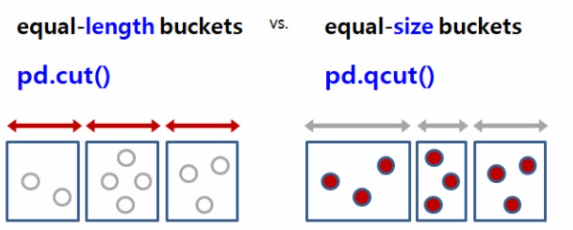

In [212]:
from IPython.display import Image, display
url_github_repo="https://github.com/EMbeDS-education/IPDPP-GSSI-20212022/raw/main/"
img=Image(url_github_repo+'jupyter/jupyterNotebooks/img/binning.png',width=500)
#img=Image(url_github_repo+'jupyter/jupyterNotebooks/images/binning.png',width=1000)
display(img)

In [213]:
import matplotlib.pyplot as plt #MATLAB-like plotting framework.

In [214]:
df_age = pd.DataFrame({'Age': np.random.normal(30, 2, 1000) })
df_age

Age
0    29.808620
1    31.763080
2    35.442566
3    31.852993
4    26.696068
..         ...
995  33.302610
996  32.336309
997  29.026336
998  30.026354
999  29.696774

[1000 rows x 1 columns]

Text(0, 0.5, 'Frequency')

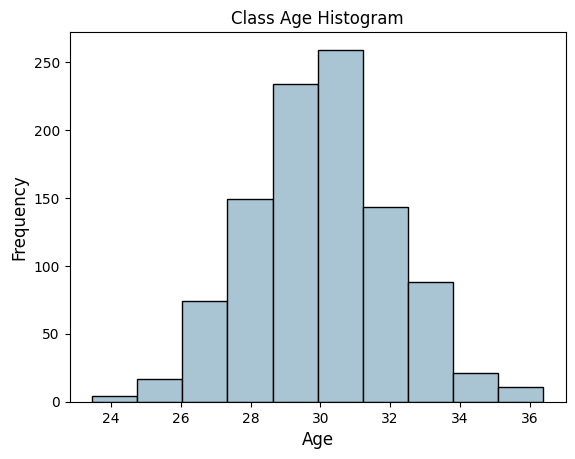

In [215]:
fig, ax = plt.subplots()
df_age['Age'].hist(bins=10, color='#A9C5D3', edgecolor='black', grid=False)
ax.set_title('Class Age Histogram', fontsize=12)
ax.set_xlabel('Age', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

In [217]:
print("cut")
df_age['bucket_w'] = pd.cut(df_age.Age, 3) 
print(df_age['bucket_w'].value_counts())# .plot(kind='bar')

print("\nqcut")
df_age['bucket_q'] = pd.qcut(df_age.Age, 3) 
print(df_age['bucket_q'].value_counts())# .plot(kind='bar')

cut
bucket_w
(27.769, 32.079]    720
(32.079, 36.389]    145
(23.446, 27.769]    135
Name: count, dtype: int64

qcut
bucket_q
(23.458, 29.141]    334
(29.141, 30.886]    333
(30.886, 36.389]    333
Name: count, dtype: int64


In [220]:
df_age['bucket_q'] = pd.cut(df_age.Age, 3,  labels=["Student", "PhD Student", "Post-Doc"]) 
df_age

Age          bucket_w     bucket_q
0    29.808620  (27.769, 32.079]  PhD Student
1    31.763080  (27.769, 32.079]  PhD Student
2    35.442566  (32.079, 36.389]     Post-Doc
3    31.852993  (27.769, 32.079]  PhD Student
4    26.696068  (23.446, 27.769]      Student
..         ...               ...          ...
995  33.302610  (32.079, 36.389]     Post-Doc
996  32.336309  (32.079, 36.389]     Post-Doc
997  29.026336  (27.769, 32.079]  PhD Student
998  30.026354  (27.769, 32.079]  PhD Student
999  29.696774  (27.769, 32.079]  PhD Student

[1000 rows x 3 columns]

In [223]:
#print(df_age['bucket_q'].value_counts())# .plot(kind='bar')
df_age['bucket_q'].value_counts()#.plot(kind='bar')

bucket_q
PhD Student    720
Post-Doc       145
Student        135
Name: count, dtype: int64

<Axes: xlabel='bucket_q'>

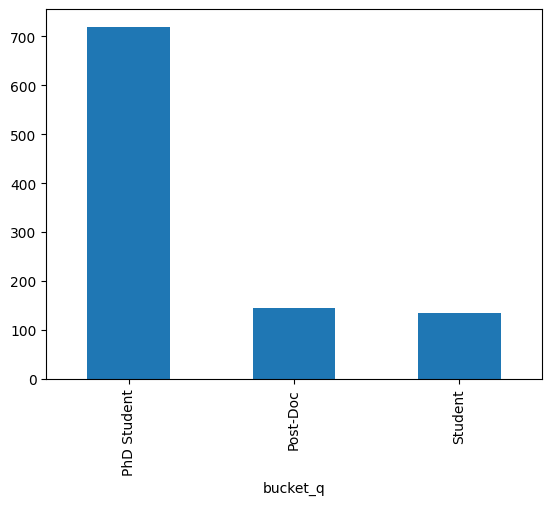

In [224]:
df_age['bucket_q'].value_counts().plot(kind='bar')

In [ ]:
df_age[['Age','bucket_q']].sort_values(by='Age')

In [ ]:
pd.cut(df_age.Age, [10,20,30,40]).value_counts()

### Concatenate, Merge, Join
Sometimes we don't have just 1 dataframe, 
- but more that we want to combine in different ways

Pandas provides various facilities for easily combining together DataFrames

#### Concatenating Along an Axis
If we have dataframes representing _chunks_ of data with same structure 
- e.g., sets of rows of a table
- we can use `concat` to concatenate their rows
  - many more options [exist](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html).

In [225]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']},
                    index=[0, 1, 2, 3])
 
df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                    'B': ['B4', 'B5', 'B6', 'B7'],
                    'C': ['C4', 'C5', 'C6', 'C7'],
                    'D': ['D4', 'D5', 'D6', 'D7']},
                    index=[4, 5, 6, 7])


df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                    'B': ['B8', 'B9', 'B10', 'B11'],
                    'C': ['C8', 'C9', 'C10', 'C11'],
                    'D': ['D8', 'D9', 'D10', 'D11']},
                    index=[8, 9, 10, 11])
 

frames = [df1, df2, df3]

result = pd.concat(frames, axis=0)
result

A    B    C    D
0    A0   B0   C0   D0
1    A1   B1   C1   D1
2    A2   B2   C2   D2
3    A3   B3   C3   D3
4    A4   B4   C4   D4
5    A5   B5   C5   D5
6    A6   B6   C6   D6
7    A7   B7   C7   D7
8    A8   B8   C8   D8
9    A9   B9   C9   D9
10  A10  B10  C10  D10
11  A11  B11  C11  D11

Note, you might need to sort the resulting dataframe

In [226]:
frames = [df2, df1, df3]

result = pd.concat(frames, axis=0)
result

A    B    C    D
4    A4   B4   C4   D4
5    A5   B5   C5   D5
6    A6   B6   C6   D6
7    A7   B7   C7   D7
0    A0   B0   C0   D0
1    A1   B1   C1   D1
2    A2   B2   C2   D2
3    A3   B3   C3   D3
8    A8   B8   C8   D8
9    A9   B9   C9   D9
10  A10  B10  C10  D10
11  A11  B11  C11  D11

In [227]:
result.sort_index()

A    B    C    D
0    A0   B0   C0   D0
1    A1   B1   C1   D1
2    A2   B2   C2   D2
3    A3   B3   C3   D3
4    A4   B4   C4   D4
5    A5   B5   C5   D5
6    A6   B6   C6   D6
7    A7   B7   C7   D7
8    A8   B8   C8   D8
9    A9   B9   C9   D9
10  A10  B10  C10  D10
11  A11  B11  C11  D11

What if some rows have same index?
- You get more rows with same index! 

In [228]:
frames = [df2, df2]
result = pd.concat(frames, axis=0)
result

A   B   C   D
4  A4  B4  C4  D4
5  A5  B5  C5  D5
6  A6  B6  C6  D6
7  A7  B7  C7  D7
4  A4  B4  C4  D4
5  A5  B5  C5  D5
6  A6  B6  C6  D6
7  A7  B7  C7  D7

In [229]:
result.loc[4]

A   B   C   D
4  A4  B4  C4  D4
4  A4  B4  C4  D4

If you want to avoid this:
- Reset the index afterwards `result.reset_index()`
- Change the index of one of the two before concatenating

But, in general, we suggest to use `concat` only if this case does not arise.
> Indeed, it is useful to split first a big dtaframe, working on the single parts and putting them back together

In [230]:
result_reset=result.reset_index()
result_reset

index   A   B   C   D
0      4  A4  B4  C4  D4
1      5  A5  B5  C5  D5
2      6  A6  B6  C6  D6
3      7  A7  B7  C7  D7
4      4  A4  B4  C4  D4
5      5  A5  B5  C5  D5
6      6  A6  B6  C6  D6
7      7  A7  B7  C7  D7

You might also be interested in dropping duplicate rows (i.e., with same values apart from index)

In [231]:
result_reset.drop_duplicates()

index   A   B   C   D
0      4  A4  B4  C4  D4
1      5  A5  B5  C5  D5
2      6  A6  B6  C6  D6
3      7  A7  B7  C7  D7

Thanks to __data alignment__, you can also concatenate dataframe with 
- __not perfectly matching structure__

In [232]:
df2['E']= ['E8', 'E9', 'E10', 'E11']
df2.drop(['D'],axis=1,inplace=True,errors='ignore')
df2

A   B   C    E
4  A4  B4  C4   E8
5  A5  B5  C5   E9
6  A6  B6  C6  E10
7  A7  B7  C7  E11

In [233]:
frames = [df1, df2, df3]

result = pd.concat(frames, axis=0)
result

A    B    C    D    E
0    A0   B0   C0   D0  NaN
1    A1   B1   C1   D1  NaN
2    A2   B2   C2   D2  NaN
3    A3   B3   C3   D3  NaN
4    A4   B4   C4  NaN   E8
5    A5   B5   C5  NaN   E9
6    A6   B6   C6  NaN  E10
7    A7   B7   C7  NaN  E11
8    A8   B8   C8   D8  NaN
9    A9   B9   C9   D9  NaN
10  A10  B10  C10  D10  NaN
11  A11  B11  C11  D11  NaN

#### Database-style merging and joining

Dimensions in combining dataframes
- `concat` combines dataframes _vertically_
   - we put together _rows_
   - but we can also add columns specifying `axis`
- [`merge` and `join`](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html) combine dataframes _horizontally_
   - we put together _columns_   
   
Some examples below were taken from [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html)

##### Merge

`Merge` operations combine datasets by 
- Linking rows using one or more keys (i.e. columns).
- These operations are central to relational databases. 
  - After all, dataframes are tables ...

Let's look at an example of `merge`

In [234]:
left = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})


right = pd.DataFrame({'key': ['K0', 'K0', 'K2', 'K2'],
                      'C': ['C0', 'C1', 'C2', 'C3'],
                      'D': ['D0', 'D1', 'D2', 'D3']})
left

key   A   B
0  K0  A0  B0
1  K1  A1  B1
2  K2  A2  B2
3  K3  A3  B3

In [235]:
right

key   C   D
0  K0  C0  D0
1  K0  C1  D1
2  K2  C2  D2
3  K2  C3  D3

We note that
- K0 and K2 appear in both dataframes
- K1 and K3 appear only in left

We want to obtain a dataframe with columns `key` and `A` to `D`, combining rows 
- with same value of `key`

In [236]:
pd.merge(left, right,  how='inner', on='key')

key   A   B   C   D
0  K0  A0  B0  C0  D0
1  K0  A0  B0  C1  D1
2  K2  A2  B2  C2  D2
3  K2  A2  B2  C3  D3

In [237]:
pd.merge(left, right,  how='outer', on='key')

key   A   B    C    D
0  K0  A0  B0   C0   D0
1  K0  A0  B0   C1   D1
2  K1  A1  B1  NaN  NaN
3  K2  A2  B2   C2   D2
4  K2  A2  B2   C3   D3
5  K3  A3  B3  NaN  NaN

In [ ]:
pd.merge(left, right,  how='left', on='key')

- The _how_ argument determines which keys are to be included in the resulting table

|  Merge method |Description  |
|---|---|
|  left |  Use keys from left frame only |  
|  right |  Use keys from right frame only |  
|  outer |  Use union of keys from both frames |  
|  inner (default) | Use intersection of keys from both frames  |  


Instead, _on_ specifies the Column to join on. 
- This must appear in both combined DataFrames

What if you want to ignore certain columns? 

In [ ]:
pd.merge(left, right,  how='inner', on='key')

In [ ]:
right

In [ ]:
pd.merge(left, right[['key','C']],  how='inner', on='key')

##### Join

Pandas exposes another method for applying merge-like operations
- **join**

Both `merge` and `join` are based on a common inner method.
- join could be useful in [specific cases](https://stackoverflow.com/questions/22676081/what-is-the-difference-between-join-and-merge-in-pandas)

# Load/manipulate remote CSV file: Simple application to Italian COVID data

In [1]:
import numpy as np
import pandas as pd 

Using Python and pandas, it is easy to read data from CSV files
- Comma-Separated Values
- Essentially an excel file written in a text file

One convenient feature is __type inference__
* You don’t need to specify which columns are numeric, integer, boolean, or string. 
* Handling dates and other custom types requires a bit more effort. 

Let us consider the national-level Italian COVID CSV data collected by Protezione civile
* It is distributed as a CSV file in a [GitHub repository](https://github.com/pcm-dpc/COVID-19/)
* You also find a local copy downloaded on 26/01/2021 in our wiki (follow the link dataset from the right-menu)

Let's read one such _remote_ CSV file into a DataFrame
* __You just need 1 instruction__

In [2]:
#Load delimited data from a file, URL, or file-like object. Use comma as default delimiter
covid_data = pd.read_csv('https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv')


In [3]:
type(covid_data)

pandas.core.frame.DataFrame

In [4]:
covid_data.head()

data stato  ricoverati_con_sintomi  terapia_intensiva  \
0  2020-02-24T18:00:00   ITA                     101                 26   
1  2020-02-25T18:00:00   ITA                     114                 35   
2  2020-02-26T18:00:00   ITA                     128                 36   
3  2020-02-27T18:00:00   ITA                     248                 56   
4  2020-02-28T18:00:00   ITA                     345                 64   

   totale_ospedalizzati  isolamento_domiciliare  totale_positivi  \
0                   127                      94              221   
1                   150                     162              311   
2                   164                     221              385   
3                   304                     284              588   
4                   409                     412              821   

   variazione_totale_positivi  nuovi_positivi  dimessi_guariti  ...  tamponi  \
0                           0             221                1  ...     4324   
1                          90              93                1  ...     8623   
2                          74              78                3  ...     9587   
3                         203             250               45  ...    12014   
4                         233             238               46  ...    15695   

   casi_testati  note  ingressi_terapia_intensiva  note_test  note_casi  \
0           NaN   NaN                         NaN        NaN        NaN   
1           NaN   NaN                         NaN        NaN        NaN   
2           NaN   NaN                         NaN        NaN        NaN   
3           NaN   NaN                         NaN        NaN        NaN   
4           NaN   NaN                         NaN        NaN        NaN   

  totale_positivi_test_molecolare  totale_positivi_test_antigenico_rapido  \
0                             NaN                                     NaN   
1                             NaN                                     NaN   
2                             NaN                                     NaN   
3                             NaN                                     NaN   
4                             NaN                                     NaN   

   tamponi_test_molecolare  tamponi_test_antigenico_rapido  
0                      NaN                             NaN  
1                      NaN                             NaN  
2                      NaN                             NaN  
3                      NaN                             NaN  
4                      NaN                             NaN  

[5 rows x 24 columns]

In [5]:
covid_data.tail()

data stato  ricoverati_con_sintomi  terapia_intensiva  \
1776  2025-01-04T17:00:00   ITA                    1278                 45   
1777  2025-01-05T17:00:00   ITA                    1267                 48   
1778  2025-01-06T17:00:00   ITA                    1289                 49   
1779  2025-01-07T17:00:00   ITA                    1314                 48   
1780  2025-01-08T17:00:00   ITA                    1315                 44   

      totale_ospedalizzati  isolamento_domiciliare  totale_positivi  \
1776                  1323                  201663           202986   
1777                  1315                  201806           203121   
1778                  1338                  201783           203121   
1779                  1362                  201844           203206   
1780                  1359                  201946           203305   

      variazione_totale_positivi  nuovi_positivi  dimessi_guariti  ...  \
1776                          74             280         26562161  ...   
1777                         135             196         26562218  ...   
1778                           0             101         26562319  ...   
1779                          85             155         26562384  ...   
1780                          99             390         26562666  ...   

        tamponi  casi_testati  note  ingressi_terapia_intensiva  note_test  \
1776  284325249    70571636.0   NaN                         3.0        NaN   
1777  284329947    70572388.0   NaN                         3.0        NaN   
1778  284333343    70573017.0   NaN                         2.0        NaN   
1779  284338302    70573883.0   NaN                         0.0        NaN   
1780  284349697    70575339.0   NaN                         3.0        NaN   

      note_casi totale_positivi_test_molecolare  \
1776        NaN                       9973077.0   
1777        NaN                       9973129.0   
1778        NaN                       9973158.0   
1779        NaN                       9973220.0   
1780        NaN                       9973389.0   

      totale_positivi_test_antigenico_rapido  tamponi_test_molecolare  \
1776                              16990736.0              103275200.0   
1777                              16990880.0              103276127.0   
1778                              16990952.0              103276857.0   
1779                              16991044.0              103277626.0   
1780                              16991265.0              103279246.0   

      tamponi_test_antigenico_rapido  
1776                     181050049.0  
1777                     181053820.0  
1778                     181056486.0  
1779                     181060676.0  
1780                     181070451.0  

[5 rows x 24 columns]

In [6]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 24 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   data                                    1781 non-null   object 
 1   stato                                   1781 non-null   object 
 2   ricoverati_con_sintomi                  1781 non-null   int64  
 3   terapia_intensiva                       1781 non-null   int64  
 4   totale_ospedalizzati                    1781 non-null   int64  
 5   isolamento_domiciliare                  1781 non-null   int64  
 6   totale_positivi                         1781 non-null   int64  
 7   variazione_totale_positivi              1781 non-null   int64  
 8   nuovi_positivi                          1781 non-null   int64  
 9   dimessi_guariti                         1781 non-null   int64  
 10  deceduti                                1781 non-null   int6

In [7]:
covid_data.describe()

ricoverati_con_sintomi  terapia_intensiva  totale_ospedalizzati  \
count             1781.000000        1781.000000           1781.000000   
mean              7088.037619         640.353172           7728.391353   
std               7898.776034         973.538666           8835.372007   
min                101.000000          17.000000            127.000000   
25%               1689.000000          69.000000           1779.000000   
50%               3627.000000         224.000000           3890.000000   
75%               8940.000000         541.000000           9424.000000   
max              34697.000000        4068.000000          38507.000000   

       isolamento_domiciliare  totale_positivi  variazione_totale_positivi  \
count            1.781000e+03     1.781000e+03                 1781.000000   
mean             3.555437e+05     3.632721e+05                  114.028074   
std              4.322126e+05     4.359967e+05                16431.105052   
min              9.400000e+01     2.210000e+02              -116092.000000   
25%              1.189450e+05     1.216410e+05                -1904.000000   
50%              1.834870e+05     1.864430e+05                  -13.000000   
75%              4.561840e+05     4.721960e+05                 1143.000000   
max              2.713594e+06     2.734906e+06               172462.000000   

       nuovi_positivi  dimessi_guariti       deceduti  \
count     1781.000000     1.781000e+03    1781.000000   
mean     14970.061202     1.512505e+07  145133.318922   
std      27891.734438     1.103205e+07   59378.589694   
min         30.000000     1.000000e+00       7.000000   
25%        904.000000     3.683189e+06  123927.000000   
50%       3964.000000     1.972254e+07  172397.000000   
75%      17030.000000     2.585769e+07  192312.000000   
max     220532.000000     2.656267e+07  198683.000000   

       casi_da_sospetto_diagnostico  ...   totale_casi       tamponi  \
count                    162.000000  ...  1.781000e+03  1.781000e+03   
mean                  345928.216049  ...  1.563346e+07  1.772970e+08   
std                   217856.889628  ...  1.105828e+07  1.103058e+08   
min                        0.000000  ...  2.290000e+02  4.324000e+03   
25%                   223237.500000  ...  4.146722e+06  6.240541e+07   
50%                   236256.500000  ...  2.112464e+07  2.376388e+08   
75%                   341673.000000  ...  2.621455e+07  2.765685e+08   
max                   988470.000000  ...  2.696465e+07  2.843497e+08   

       casi_testati  ingressi_terapia_intensiva  note_test  note_casi  \
count  1.726000e+03                 1498.000000        0.0        0.0   
mean   4.919885e+07                   39.718959        NaN        NaN   
std    2.415391e+07                   56.889354        NaN        NaN   
min    9.353100e+05                    0.000000        NaN        NaN   
25%    2.928186e+07                    6.000000        NaN        NaN   
50%    6.309936e+07                   18.000000        NaN        NaN   
75%    6.951731e+07                   40.000000        NaN        NaN   
max    9.530363e+07                  324.000000        NaN        NaN   

       totale_positivi_test_molecolare  \
count                     1.455000e+03   
mean                      8.171171e+06   
std                       2.458939e+06   
min                       2.351466e+06   
25%                       6.543402e+06   
50%                       9.693763e+06   
75%                       9.927212e+06   
max                       1.036965e+07   

       totale_positivi_test_antigenico_rapido  tamponi_test_molecolare  \
count                            1.455000e+03             1.455000e+03   
mean                             1.083959e+07             8.749335e+07   
std                              6.965488e+06             2.182236e+07   
min                              9.570000e+02             2.861735e+07   
25%                              1.712678e+06             7.725649e

In [8]:
covid_data['data']

0       2020-02-24T18:00:00
1       2020-02-25T18:00:00
2       2020-02-26T18:00:00
3       2020-02-27T18:00:00
4       2020-02-28T18:00:00
               ...         
1776    2025-01-04T17:00:00
1777    2025-01-05T17:00:00
1778    2025-01-06T17:00:00
1779    2025-01-07T17:00:00
1780    2025-01-08T17:00:00
Name: data, Length: 1781, dtype: object

In [9]:
covid_data[ ['data','terapia_intensiva'] ]

data  terapia_intensiva
0     2020-02-24T18:00:00                 26
1     2020-02-25T18:00:00                 35
2     2020-02-26T18:00:00                 36
3     2020-02-27T18:00:00                 56
4     2020-02-28T18:00:00                 64
...                   ...                ...
1776  2025-01-04T17:00:00                 45
1777  2025-01-05T17:00:00                 48
1778  2025-01-06T17:00:00                 49
1779  2025-01-07T17:00:00                 48
1780  2025-01-08T17:00:00                 44

[1781 rows x 2 columns]

In [10]:
covid_data.data

0       2020-02-24T18:00:00
1       2020-02-25T18:00:00
2       2020-02-26T18:00:00
3       2020-02-27T18:00:00
4       2020-02-28T18:00:00
               ...         
1776    2025-01-04T17:00:00
1777    2025-01-05T17:00:00
1778    2025-01-06T17:00:00
1779    2025-01-07T17:00:00
1780    2025-01-08T17:00:00
Name: data, Length: 1781, dtype: object

In [11]:
covid_data.iloc[0]

data                                      2020-02-24T18:00:00
stato                                                     ITA
ricoverati_con_sintomi                                    101
terapia_intensiva                                          26
totale_ospedalizzati                                      127
isolamento_domiciliare                                     94
totale_positivi                                           221
variazione_totale_positivi                                  0
nuovi_positivi                                            221
dimessi_guariti                                             1
deceduti                                                    7
casi_da_sospetto_diagnostico                              NaN
casi_da_screening                                         NaN
totale_casi                                               229
tamponi                                                  4324
casi_testati                                              NaN
note    

In [12]:
covid_data.iloc[-1]

data                                      2025-01-08T17:00:00
stato                                                     ITA
ricoverati_con_sintomi                                   1315
terapia_intensiva                                          44
totale_ospedalizzati                                     1359
isolamento_domiciliare                                 201946
totale_positivi                                        203305
variazione_totale_positivi                                 99
nuovi_positivi                                            390
dimessi_guariti                                      26562666
deceduti                                               198683
casi_da_sospetto_diagnostico                              NaN
casi_da_screening                                         NaN
totale_casi                                          26964654
tamponi                                             284349697
casi_testati                                       70575339.0
note    

In [13]:
#Get the last day in the CSV file
last_day = covid_data['data'].iloc[-1]
last_day

'2025-01-08T17:00:00'

Using DataFrame’s to_csv method, we can write the data out to a comma-separated file
* Let's create a CSV file containing only the data about the latest day

In [14]:
covid_data.data == last_day

0       False
1       False
2       False
3       False
4       False
        ...  
1776    False
1777    False
1778    False
1779    False
1780     True
Name: data, Length: 1781, dtype: bool

In [ ]:
print(covid_data.data == last_day) # Evaluates to True for the rows that satisfy this guard
cov_regions_last_day = covid_data[ covid_data.data == last_day ] # Get all the rows that satisfy the guard above
cov_regions_last_day

0       False
1       False
2       False
3       False
4       False
        ...  
1776    False
1777    False
1778    False
1779    False
1780     True
Name: data, Length: 1781, dtype: bool


data stato  ricoverati_con_sintomi  terapia_intensiva  \
1780  2025-01-08T17:00:00   ITA                    1315                 44   

      totale_ospedalizzati  isolamento_domiciliare  totale_positivi  \
1780                  1359                  201946           203305   

      variazione_totale_positivi  nuovi_positivi  dimessi_guariti  ...  \
1780                          99             390         26562666  ...   

        tamponi  casi_testati  note  ingressi_terapia_intensiva  note_test  \
1780  284349697    70575339.0   NaN                         3.0        NaN   

      note_casi totale_positivi_test_molecolare  \
1780        NaN                       9973389.0   

      totale_positivi_test_antigenico_rapido  tamponi_test_molecolare  \
1780                              16991265.0              103279246.0   

      tamponi_test_antigenico_rapido  
1780                     181070451.0  

[1 rows x 24 columns]

In [16]:
cov_regions_last_day.to_csv('covid_lastday.csv')

Or, more compactly

In [17]:
covid_data[covid_data.data == covid_data['data'].iloc[-1]].to_csv('covid_lastday_b.csv')

In [18]:
covid_data[covid_data['ricoverati_con_sintomi'] > 10000].to_csv('covid_more_than_10k.csv')

In [19]:
covid_data[covid_data['ricoverati_con_sintomi'] > 25000].to_csv('covid_more_than_25k.csv')

# Plot dataframes: Simple application to Yahoo! Finance stock prices - %change, correlation
Let’s consider some DataFrames of stock prices obtained from
Yahoo! Finance
- Other services can be found here https://pandas-datareader.readthedocs.io/en/latest/remote_data.html

  - Tiingo

  - IEX

  - Alpha Vantage

  - Econdb

  - Enigma

  - Quandl

  - St.Louis FED (FRED)

  - Kenneth French’s data library

  - World Bank

  - OECD

  - Eurostat

  - Thrift Savings Plan

  - Nasdaq Trader symbol definitions

  - Stooq

  - MOEX

  - Naver Finance

  - Yahoo Finance

## Install required libraries

In [20]:
## install Yahoo! Finance market data downloader for Pandas
#pandas_datareader not necessary anymore. use yfinance
####%pip install -U pandas_datareader #convenient package for accessing online data (mostly finance-related)
%pip install yfinance

#'the' pyhton package for creating plots 
# %pip install matplotlib 
# Helps formatting strings with HTML and CSS.
%pip install -U Jinja2 


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [21]:
# Libraries to download the dats
#import pandas_datareader.data as web
import yfinance as yf

#Libraries for data visualization and manipulation
import matplotlib.pyplot as plt #MATLAB-like plotting framework.
import pandas as pd

#A type to represent dates
from datetime import datetime

## Download and combine data of interest

With the following few lines of code we 
- Download data in different dataframes
- Extract and conmbine the data of interest

In [22]:
#Specify the period of interest:
today = datetime.today().strftime('%Y-%m-%d')
first_day=datetime(2004,8,19)

companies=['AAPL', 'IBM', 'MSFT', 'GOOG']

yf.download(companies,first_day,today, auto_adjust=True)['Close']

[*********************100%***********************]  4 of 4 completed


Ticker            AAPL        GOOG         IBM        MSFT
Date                                                      
2004-08-19    0.460512    2.482147   43.305237   16.712919
2004-08-20    0.461862    2.679304   43.488892   16.762215
2004-08-23    0.466061    2.706268   43.182819   16.836386
2004-08-24    0.479107    2.594207   43.213421   16.836386
2004-08-25    0.495602    2.622160   43.397057   17.027992
...                ...         ...         ...         ...
2025-11-28  278.850006  320.119995  308.579987  492.010010
2025-12-01  283.100006  315.119995  305.670013  486.739990
2025-12-02  286.190002  316.019989  301.779999  490.000000
2025-12-03  284.149994  320.619995  302.619995  477.730011
2025-12-04  280.700012  318.390015  307.989990  480.839996

[5359 rows x 4 columns]

In [ ]:
#yf.download(['AAPL', 'IBM', 'MSFT', 'GOOG'],'2022-1-1',today, auto_adjust=True)['Close']

[*********************100%***********************]  4 of 4 completed


Ticker            AAPL        GOOG         IBM        MSFT
Date                                                      
2022-01-03  178.270325  144.088470  116.169739  323.898376
2022-01-04  176.007782  143.434937  117.860550  318.344452
2022-01-05  171.326004  136.717911  118.031357  306.123932
2022-01-06  168.465988  136.616089  115.571976  303.704956
2022-01-07  168.632477  136.073318  115.136482  303.859772
...                ...         ...         ...         ...
2025-11-28  278.850006  320.119995  308.579987  492.010010
2025-12-01  283.100006  315.119995  305.670013  486.739990
2025-12-02  286.190002  316.019989  301.779999  490.000000
2025-12-03  284.149994  320.619995  302.619995  477.730011
2025-12-04  280.700012  318.390015  307.989990  480.839996

[985 rows x 4 columns]

## Compute, plot, and smooth returns

Now, creating a simple plot of the dataframe takes only 1 line

<Axes: xlabel='Date'>

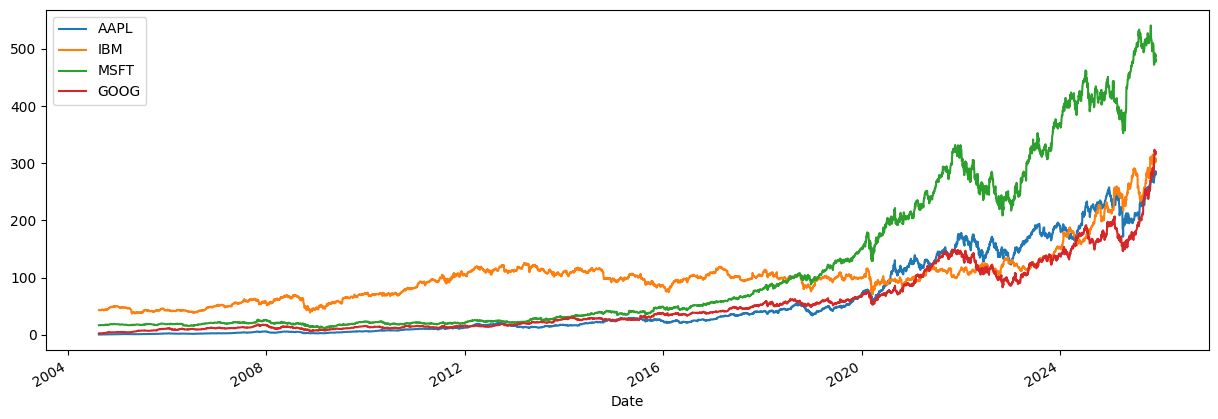

In [35]:
# plotting price dataframe. 
price.plot(figsize=(15,5))

In stock-markets, often one is interested in the _percent changes of the prices_
* % change from previous value

Let us compute it
- Actually, __let us ask Pandas to compute it__ for us!
- Method `pct_change()` does precisely this
  - Computes the percentage change from the immediately previous row by default. 
  - This is useful in comparing the percentage of change in a time series of elements.

In [36]:
returns = price.pct_change() 
returns.head()

AAPL       IBM      MSFT      GOOG
Date                                              
2004-08-19       NaN       NaN       NaN       NaN
2004-08-20  0.002931  0.004241  0.002950  0.079430
2004-08-23  0.009091 -0.007038  0.004425  0.010064
2004-08-24  0.027993  0.000709  0.000000 -0.041408
2004-08-25  0.034429  0.004250  0.011381  0.010775

In [37]:
returns.dropna(inplace=True)
returns

AAPL       IBM      MSFT      GOOG
Date                                              
2004-08-20  0.002931  0.004241  0.002950  0.079430
2004-08-23  0.009091 -0.007038  0.004425  0.010064
2004-08-24  0.027993  0.000709  0.000000 -0.041408
2004-08-25  0.034429  0.004250  0.011381  0.010775
2004-08-26  0.048714 -0.004467 -0.003993  0.018019
...              ...       ...       ...       ...
2025-11-28  0.004684  0.017710  0.013409 -0.000500
2025-12-01  0.015241 -0.009430 -0.010711 -0.015619
2025-12-02  0.010915 -0.012726  0.006698  0.002856
2025-12-03 -0.007128  0.002783 -0.025041  0.014556
2025-12-04 -0.012141  0.017745  0.006510 -0.006955

[5358 rows x 4 columns]

<Axes: xlabel='Date'>

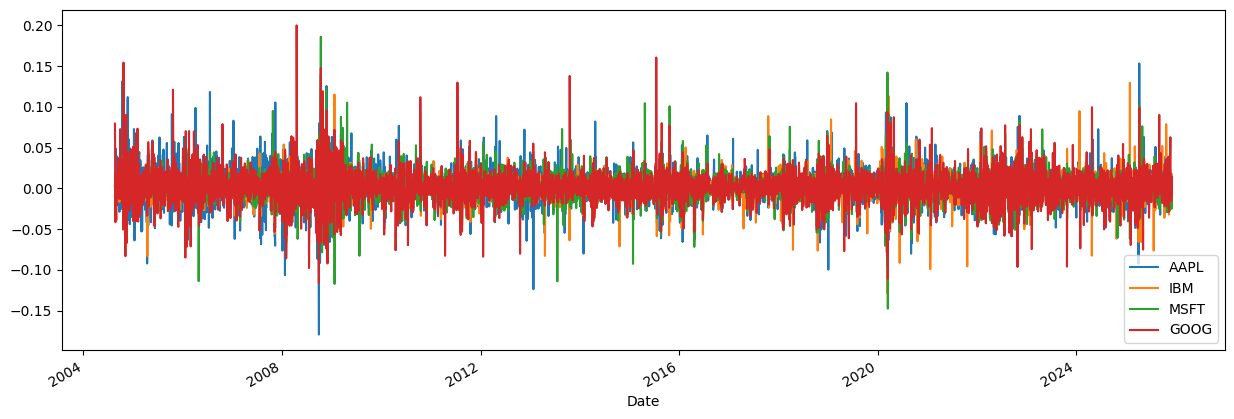

In [38]:
returns.plot(figsize=(15,5))

Can I smooth the data using moving averages/window averages?

In [39]:
#By default, the rolling object consideres a window of 15 rows before the current row (actually, 3 if not specified)
returns_smooth=returns.rolling(15).mean()
returns_smooth
#returns_smooth.head(16)

AAPL       IBM      MSFT      GOOG
Date                                              
2004-08-20       NaN       NaN       NaN       NaN
2004-08-23       NaN       NaN       NaN       NaN
2004-08-24       NaN       NaN       NaN       NaN
2004-08-25       NaN       NaN       NaN       NaN
2004-08-26       NaN       NaN       NaN       NaN
...              ...       ...       ...       ...
2025-11-28  0.002327 -0.000300 -0.000470  0.008004
2025-12-01  0.003664  0.000360 -0.001146  0.008281
2025-12-02  0.004089 -0.001457 -0.001932  0.005876
2025-12-03  0.002174 -0.002262 -0.003954  0.006582
2025-12-04  0.001795 -0.001346 -0.003843  0.007103

[5358 rows x 4 columns]

In this case
- It makes sense to drop the NA rows...

In [40]:
returns_smooth.dropna(inplace=True)
returns_smooth

AAPL       IBM      MSFT      GOOG
Date                                              
2004-09-10  0.010591  0.001467  0.001126  0.003639
2004-09-13  0.009876  0.000977  0.000347 -0.000283
2004-09-14  0.009082  0.001623  0.000517  0.001520
2004-09-15  0.006671  0.001307 -0.000090  0.004586
2004-09-16  0.006554  0.000831 -0.000677  0.005040
...              ...       ...       ...       ...
2025-11-28  0.002327 -0.000300 -0.000470  0.008004
2025-12-01  0.003664  0.000360 -0.001146  0.008281
2025-12-02  0.004089 -0.001457 -0.001932  0.005876
2025-12-03  0.002174 -0.002262 -0.003954  0.006582
2025-12-04  0.001795 -0.001346 -0.003843  0.007103

[5344 rows x 4 columns]

<Axes: xlabel='Date'>

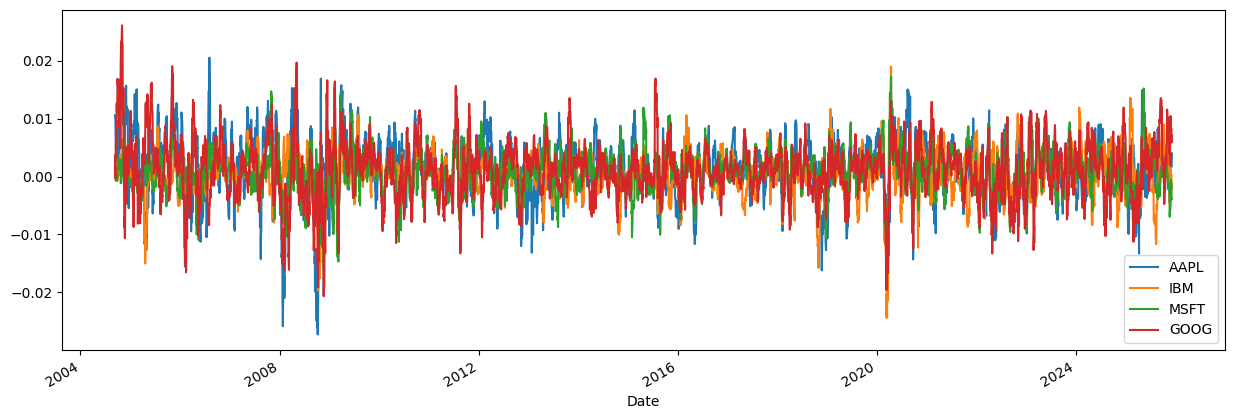

In [41]:
returns_smooth.plot(figsize=(15,5))

## Are there any correlations among these companies?

DataFrames offer two methods for computing 
* the __correlation__ among the elements in the DataFrame (`corr`)
* the __covariance__ matrix of the DataFrame (`cov`)

In [42]:
returns

AAPL       IBM      MSFT      GOOG
Date                                              
2004-08-20  0.002931  0.004241  0.002950  0.079430
2004-08-23  0.009091 -0.007038  0.004425  0.010064
2004-08-24  0.027993  0.000709  0.000000 -0.041408
2004-08-25  0.034429  0.004250  0.011381  0.010775
2004-08-26  0.048714 -0.004467 -0.003993  0.018019
...              ...       ...       ...       ...
2025-11-28  0.004684  0.017710  0.013409 -0.000500
2025-12-01  0.015241 -0.009430 -0.010711 -0.015619
2025-12-02  0.010915 -0.012726  0.006698  0.002856
2025-12-03 -0.007128  0.002783 -0.025041  0.014556
2025-12-04 -0.012141  0.017745  0.006510 -0.006955

[5358 rows x 4 columns]

In [43]:
returns.corr()

AAPL       IBM      MSFT      GOOG
AAPL  1.000000  0.412595  0.520896  0.512906
IBM   0.412595  1.000000  0.463280  0.377986
MSFT  0.520896  0.463280  1.000000  0.556986
GOOG  0.512906  0.377986  0.556986  1.000000

In [44]:
returns.corr().style.background_gradient(cmap='Reds')

In [45]:
returns.cov()

AAPL       IBM      MSFT      GOOG
AAPL  0.000417  0.000123  0.000180  0.000203
IBM   0.000123  0.000212  0.000114  0.000106
MSFT  0.000180  0.000114  0.000286  0.000182
GOOG  0.000203  0.000106  0.000182  0.000374

In [46]:
returns.cov().style.background_gradient(cmap='Reds')

## What about risk?

__Please, forgive my ignorance :D__

For each company, we can calculate:
- the mean of the returns
- the standard deviation of the returns

These statistics are very important for investors:
- Mean returns give us an understanding of the profitability of an investment
- The standard deviation measures how much the returns fluctuate. 
  - We call this __risk__. 

> Typically __higher risks are associated with higher returns__. 
> - Which company has highest returns?
> - Which company has highest risk?

In [47]:
returns.mean()

AAPL    0.001406
IBM     0.000472
MSFT    0.000770
GOOG    0.001092
dtype: float64

In [48]:
print("The maximum mean is in:",returns.mean().idxmax() )
print("The maximum standard deviation is in:",returns.std().idxmax())

The maximum mean is in: AAPL
The maximum standard deviation is in: AAPL


In [49]:
returns.mean()

AAPL    0.001406
IBM     0.000472
MSFT    0.000770
GOOG    0.001092
dtype: float64

In [50]:
returns.std()

AAPL    0.020426
IBM     0.014550
MSFT    0.016914
GOOG    0.019330
dtype: float64

In [51]:
returns.describe()

AAPL          IBM         MSFT         GOOG
count  5358.000000  5358.000000  5358.000000  5358.000000
mean      0.001406     0.000472     0.000770     0.001092
std       0.020426     0.014550     0.016914     0.019330
min      -0.179195    -0.128507    -0.147390    -0.116091
25%      -0.008165    -0.006320    -0.007078    -0.007928
50%       0.001154     0.000544     0.000478     0.000856
75%       0.011655     0.007477     0.008809     0.010317
max       0.153289     0.129642     0.186046     0.199915

In [52]:
returns.describe().loc['mean':'std']

AAPL       IBM      MSFT      GOOG
mean  0.001406  0.000472  0.000770  0.001092
std   0.020426  0.014550  0.016914  0.019330

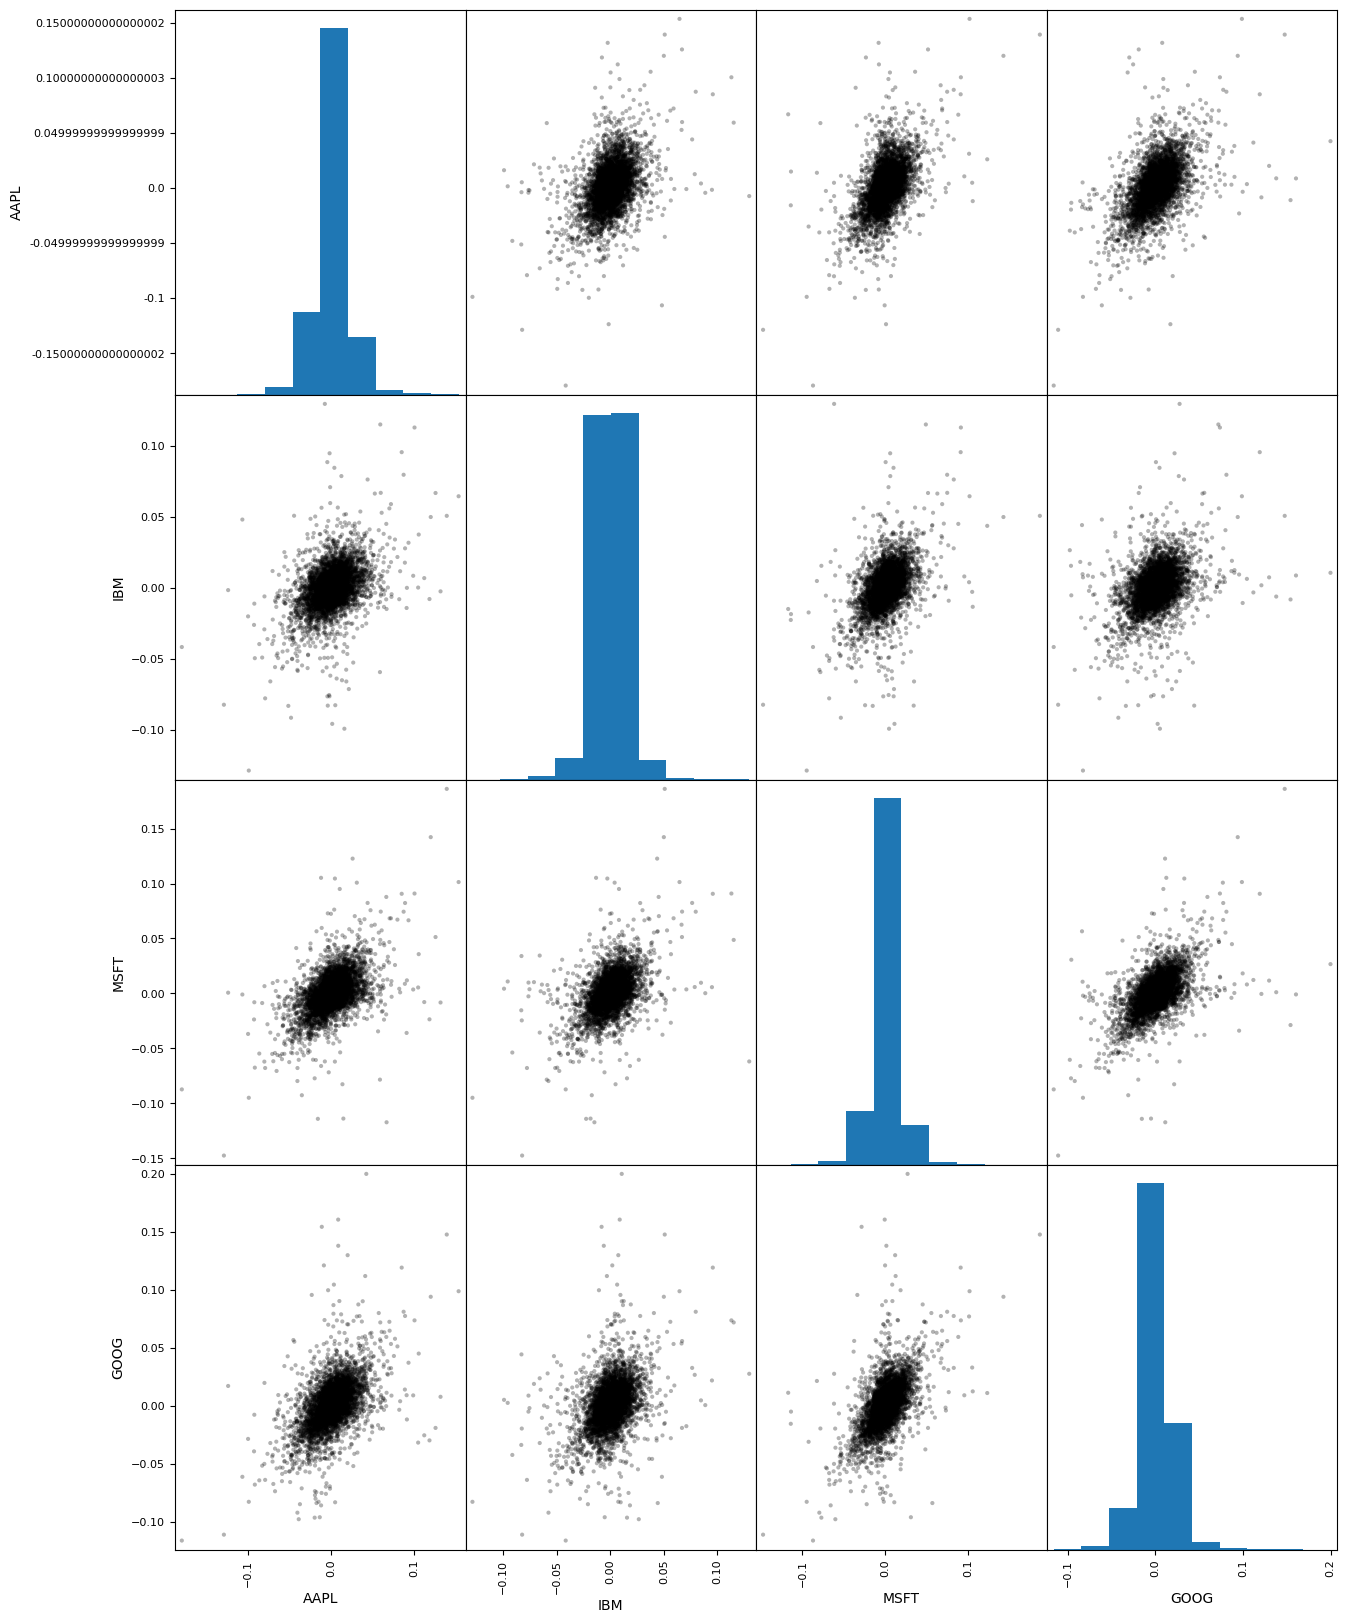

In [53]:
pd.plotting.scatter_matrix(returns,figsize =(15,20),  color='k', alpha=0.3)
plt.show()

## Interested in playing more with this case study?

https://towardsdatascience.com/analyzing-financial-data-in-python-ccf5c99f55e8

https://colab.research.google.com/corgiredirector?site=https%3A%2F%2Ftowardsdatascience.com%2Fanalyzing-financial-data-in-python-ccf5c99f55e8%3Fgi%3D7a3fb215ea05

> A few things changes in the library after the post has been written
> - Adapt our code to download new financial data
> - The webpage contains material on __risk analysis!__

## What about the Italian stock market?

In [54]:
# Import all libraries

import yfinance as yf

import matplotlib.pyplot as plt 
import pandas as pd

from datetime import datetime

In [55]:
#Just a test to check whether data can be downloaded
#yf.download('REC.MI')

In [56]:
#Set first and last day of interest, and download data

today = datetime.today().strftime('%Y-%m-%d')
print(today)

first_day=datetime(2004,8,19)
print(first_day)

companies=['REC.MI', 'BRE.MI', 'IP.MI', 'STLAM.MI']
price=yf.download(companies,first_day,today, auto_adjust=True)['Close']

price

2025-12-05
2004-08-19 00:00:00


[*********************100%***********************]  4 of 4 completed


Ticker        BRE.MI      IP.MI     REC.MI  STLAM.MI
Date                                                
2004-08-19  0.639427   2.734946   1.986411  0.650683
2004-08-20  0.631318   2.715596   1.972923  0.639820
2004-08-23  0.648694   2.741397   1.974149  0.647424
2004-08-24  0.654486   2.734946   1.953304  0.651769
2004-08-25  0.653327   2.760748   1.943494  0.646337
...              ...        ...        ...       ...
2025-11-27  9.100000  43.459999  50.500000  9.014000
2025-11-28  9.180000  43.799999  50.900002  9.193000
2025-12-01  9.220000  44.040001  50.349998  9.225000
2025-12-02  9.270000  43.560001  49.520000  9.129000
2025-12-03  9.305000  43.459999  49.459999  9.832000

[5418 rows x 4 columns]

<Axes: xlabel='Date'>

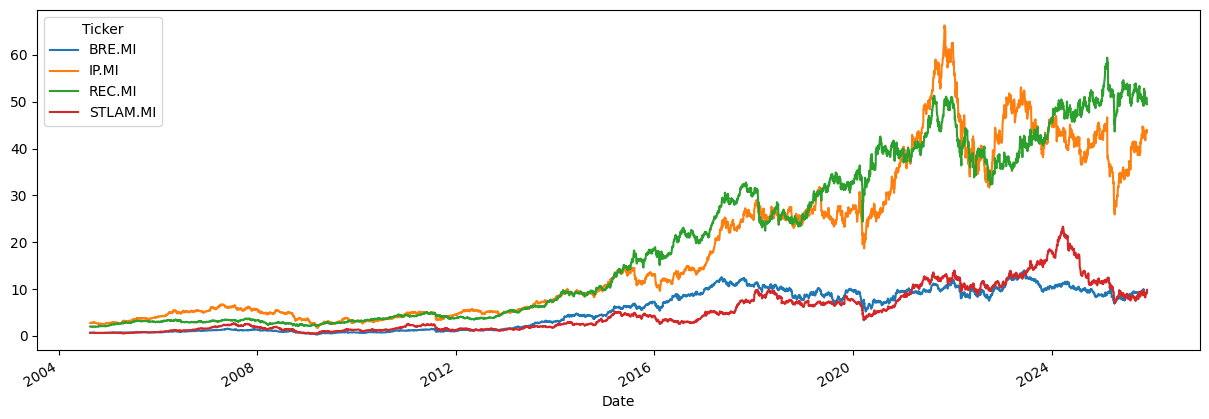

In [57]:
price.plot(figsize=(15,5))

In [58]:
returns = price.pct_change() 
returns.head()

Ticker        BRE.MI     IP.MI    REC.MI  STLAM.MI
Date                                              
2004-08-19       NaN       NaN       NaN       NaN
2004-08-20 -0.012681 -0.007075 -0.006790 -0.016695
2004-08-23  0.027523  0.009501  0.000622  0.011885
2004-08-24  0.008928 -0.002353 -0.010559  0.006711
2004-08-25 -0.001770  0.009434 -0.005022 -0.008334

In [59]:
returns.dropna(inplace=True)
returns

Ticker        BRE.MI     IP.MI    REC.MI  STLAM.MI
Date                                              
2004-08-20 -0.012681 -0.007075 -0.006790 -0.016695
2004-08-23  0.027523  0.009501  0.000622  0.011885
2004-08-24  0.008928 -0.002353 -0.010559  0.006711
2004-08-25 -0.001770  0.009434 -0.005022 -0.008334
2004-08-26  0.001773  0.004673  0.011356  0.000000
...              ...       ...       ...       ...
2025-11-27  0.006637  0.000460 -0.000989  0.007263
2025-11-28  0.008791  0.007823  0.007921  0.019858
2025-12-01  0.004357  0.005479 -0.010806  0.003481
2025-12-02  0.005423 -0.010899 -0.016485 -0.010407
2025-12-03  0.003776 -0.002296 -0.001212  0.077007

[5417 rows x 4 columns]

<Axes: xlabel='Date'>

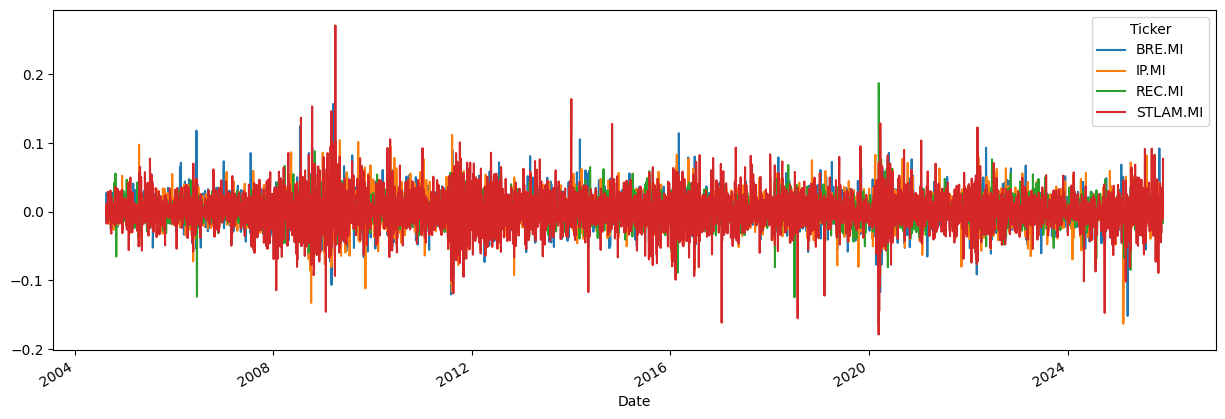

In [60]:
returns.plot(figsize=(15,5))

Can I smooth the data using moving averages/window averages?

In [61]:
returns_smooth=returns.rolling(15).mean()

returns_smooth.dropna(inplace=True)

returns_smooth
#returns_smooth.head(16)

Ticker        BRE.MI     IP.MI    REC.MI  STLAM.MI
Date                                              
2004-09-09  0.001026  0.001935 -0.001418  0.002581
2004-09-10  0.002585  0.002101  0.000297  0.002943
2004-09-13  0.000986  0.001313 -0.000570  0.002476
2004-09-14  0.000626  0.002856  0.000635  0.001705
2004-09-15  0.000276  0.001171  0.000555  0.001827
...              ...       ...       ...       ...
2025-11-27 -0.005881 -0.000430  0.001508  0.002408
2025-11-28 -0.004324  0.002343  0.002541  0.003946
2025-12-01 -0.004373  0.001323  0.000976  0.002601
2025-12-02 -0.004147 -0.000206 -0.002572 -0.000844
2025-12-03 -0.002916 -0.000511 -0.004249  0.004713

[5403 rows x 4 columns]

<Axes: xlabel='Date'>

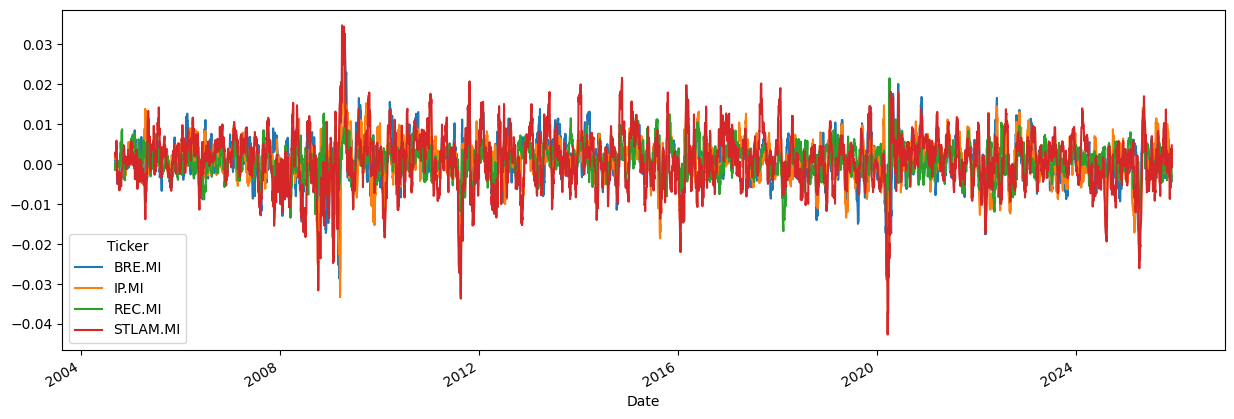

In [62]:
returns_smooth.plot(figsize=(15,5))

In [63]:
returns.corr().style.background_gradient(cmap='Reds')

# More on plotting: More complex application to Italian COVID data
Pandas offers a number of plotting methods for DataFrame objects

In [64]:
#%pip install matplotlib

#import sys
#!"{sys.executable}" -m pip install matplotlib

The Italian Civil Protection Department publishes everyday [data on the status of the COVID-19 epidemy in Italy](https://github.com/pcm-dpc/COVID-19)

The repository contains trend data of the COVID'19 pandemic in Italy
- ‘dati-andamento-nazionale’ (national-level), 
- ‘dati-regioni’ (regional-level),
- ‘dati-province’ (province-level) 

In [65]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
#import warnings
#warnings.filterwarnings("ignore")

## Line Plots
Series and DataFrame each have a plot method for making many different types of plots
* By default, they make line plots 

Let's load again the national-level COVID'19 data
- We set the date (`data`) as the index column
- We tell pandas to interpret such column as a datetime type

In [66]:
# load data relating to the national trend of SARS-CoV-2 spread on Pandas DataFrame
url_dpc_nazionale = 'https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv'
covid_italy = pd.read_csv(url_dpc_nazionale, index_col='data')
covid_italy.tail()

stato  ricoverati_con_sintomi  terapia_intensiva  \
data                                                                   
2025-01-04T17:00:00   ITA                    1278                 45   
2025-01-05T17:00:00   ITA                    1267                 48   
2025-01-06T17:00:00   ITA                    1289                 49   
2025-01-07T17:00:00   ITA                    1314                 48   
2025-01-08T17:00:00   ITA                    1315                 44   

                     totale_ospedalizzati  isolamento_domiciliare  \
data                                                                
2025-01-04T17:00:00                  1323                  201663   
2025-01-05T17:00:00                  1315                  201806   
2025-01-06T17:00:00                  1338                  201783   
2025-01-07T17:00:00                  1362                  201844   
2025-01-08T17:00:00                  1359                  201946   

                     totale_positivi  variazione_totale_positivi  \
data                                                               
2025-01-04T17:00:00           202986                          74   
2025-01-05T17:00:00           203121                         135   
2025-01-06T17:00:00           203121                           0   
2025-01-07T17:00:00           203206                          85   
2025-01-08T17:00:00           203305                          99   

                     nuovi_positivi  dimessi_guariti  deceduti  ...  \
data                                                            ...   
2025-01-04T17:00:00             280         26562161    198666  ...   
2025-01-05T17:00:00             196         26562218    198670  ...   
2025-01-06T17:00:00             101         26562319    198670  ...   
2025-01-07T17:00:00             155         26562384    198674  ...   
2025-01-08T17:00:00             390         26562666    198683  ...   

                       tamponi  casi_testati  note  \
data                                                 
2025-01-04T17:00:00  284325249    70571636.0   NaN   
2025-01-05T17:00:00  284329947    70572388.0   NaN   
2025-01-06T17:00:00  284333343    70573017.0   NaN   
2025-01-07T17:00:00  284338302    70573883.0   NaN   
2025-01-08T17:00:00  284349697    70575339.0   NaN   

                     ingressi_terapia_intensiva  note_test note_casi  \
data                                                                   
2025-01-04T17:00:00                         3.0        NaN       NaN   
2025-01-05T17:00:00                         3.0        NaN       NaN   
2025-01-06T17:00:00                         2.0        NaN       NaN   
2025-01-07T17:00:00                         0.0        NaN       NaN   
2025-01-08T17:00:00                         3.0        NaN       NaN   

                     totale_positivi_test_molecolare  \
data                                                   
2025-01-04T17:00:00                        9973077.0   
2025-01-05T17:00:00                        9973129.0   
2025-01-06T17:00:00                        9973158.0   
2025-01-07T17:00:00                        9973220.0   
2025-01-08T17:00:00                        9973389.0   

                     totale_positivi_test_antigenico_rapido  \
data                                                          
2025-01-04T17:00:00                              16990736.0   
2025-01-05T17:00:00                              16990880.0   
2025-01-06T17:00:00                              16990952.0   
2025-01-07T17:00:00                              16991044.0   
2025-01-08T17:00:00                              16991265.0   

                     tamponi_test_molecolare  tamponi_test_antigenico_rapido  
data                                                                          
2025-01-04T17:00:00              103275200.0                     181050049.0  
2025-01-05T17:00:00              103276127.0                     181053820.0  
2025-01-06T17:00:00  

In [67]:
covid_italy.head()

stato  ricoverati_con_sintomi  terapia_intensiva  \
data                                                                   
2020-02-24T18:00:00   ITA                     101                 26   
2020-02-25T18:00:00   ITA                     114                 35   
2020-02-26T18:00:00   ITA                     128                 36   
2020-02-27T18:00:00   ITA                     248                 56   
2020-02-28T18:00:00   ITA                     345                 64   

                     totale_ospedalizzati  isolamento_domiciliare  \
data                                                                
2020-02-24T18:00:00                   127                      94   
2020-02-25T18:00:00                   150                     162   
2020-02-26T18:00:00                   164                     221   
2020-02-27T18:00:00                   304                     284   
2020-02-28T18:00:00                   409                     412   

                     totale_positivi  variazione_totale_positivi  \
data                                                               
2020-02-24T18:00:00              221                           0   
2020-02-25T18:00:00              311                          90   
2020-02-26T18:00:00              385                          74   
2020-02-27T18:00:00              588                         203   
2020-02-28T18:00:00              821                         233   

                     nuovi_positivi  dimessi_guariti  deceduti  ...  tamponi  \
data                                                            ...            
2020-02-24T18:00:00             221                1         7  ...     4324   
2020-02-25T18:00:00              93                1        10  ...     8623   
2020-02-26T18:00:00              78                3        12  ...     9587   
2020-02-27T18:00:00             250               45        17  ...    12014   
2020-02-28T18:00:00             238               46        21  ...    15695   

                     casi_testati  note  ingressi_terapia_intensiva  \
data                                                                  
2020-02-24T18:00:00           NaN   NaN                         NaN   
2020-02-25T18:00:00           NaN   NaN                         NaN   
2020-02-26T18:00:00           NaN   NaN                         NaN   
2020-02-27T18:00:00           NaN   NaN                         NaN   
2020-02-28T18:00:00           NaN   NaN                         NaN   

                     note_test note_casi  totale_positivi_test_molecolare  \
data                                                                        
2020-02-24T18:00:00        NaN       NaN                              NaN   
2020-02-25T18:00:00        NaN       NaN                              NaN   
2020-02-26T18:00:00        NaN       NaN                              NaN   
2020-02-27T18:00:00        NaN       NaN                              NaN   
2020-02-28T18:00:00        NaN       NaN                              NaN   

                     totale_positivi_test_antigenico_rapido  \
data                                                          
2020-02-24T18:00:00                                     NaN   
2020-02-25T18:00:00                                     NaN   
2020-02-26T18:00:00                                     NaN   
2020-02-27T18:00:00                                     NaN   
2020-02-28T18:00:00                                     NaN   

                     tamponi_test_molecolare  tamponi_test_antigenico_rapido  
data                                                                          
2020-02-24T18:00:00                      NaN                             NaN  
2020-02-25T18:00:00                      NaN                             NaN  
2020-02-26T18:00:00                      NaN                             NaN  
2020-02-27T18:00:00                      NaN                             NaN  
2020-02-28T18:00:00                    

Pandas considers the date as a string
- Let's tell to pands that it is a date
- This will allow us to reason in terms of time

In [68]:
print(covid_italy.index)
covid_italy.index = pd.to_datetime(covid_italy.index) # converts 'data' column from object to datatime type
#covid_italy.tail()
print()
print(covid_italy.index)

Index(['2020-02-24T18:00:00', '2020-02-25T18:00:00', '2020-02-26T18:00:00',
       '2020-02-27T18:00:00', '2020-02-28T18:00:00', '2020-02-29T18:00:00',
       '2020-03-01T18:00:00', '2020-03-02T18:00:00', '2020-03-03T18:00:00',
       '2020-03-04T18:00:00',
       ...
       '2024-12-30T17:00:00', '2024-12-31T17:00:00', '2025-01-01T17:00:00',
       '2025-01-02T17:00:00', '2025-01-03T17:00:00', '2025-01-04T17:00:00',
       '2025-01-05T17:00:00', '2025-01-06T17:00:00', '2025-01-07T17:00:00',
       '2025-01-08T17:00:00'],
      dtype='object', name='data', length=1781)

DatetimeIndex(['2020-02-24 18:00:00', '2020-02-25 18:00:00',
               '2020-02-26 18:00:00', '2020-02-27 18:00:00',
               '2020-02-28 18:00:00', '2020-02-29 18:00:00',
               '2020-03-01 18:00:00', '2020-03-02 18:00:00',
               '2020-03-03 18:00:00', '2020-03-04 18:00:00',
               ...
               '2024-12-30 17:00:00', '2024-12-31 17:00:00',
               '2025-01-01 17:00:00', 

Let us focucs only on
- currently infected (`totale_positivi`)
- overall recovered (`dimessi_guariti`)
- overall deceased (`deceduti`)

In [69]:
covid_italy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1781 entries, 2020-02-24 18:00:00 to 2025-01-08 17:00:00
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   stato                                   1781 non-null   object 
 1   ricoverati_con_sintomi                  1781 non-null   int64  
 2   terapia_intensiva                       1781 non-null   int64  
 3   totale_ospedalizzati                    1781 non-null   int64  
 4   isolamento_domiciliare                  1781 non-null   int64  
 5   totale_positivi                         1781 non-null   int64  
 6   variazione_totale_positivi              1781 non-null   int64  
 7   nuovi_positivi                          1781 non-null   int64  
 8   dimessi_guariti                         1781 non-null   int64  
 9   deceduti                                1781 non-null   int64  
 10  casi_da_sospetto_diagnos

In [70]:
covid_italy

stato  ricoverati_con_sintomi  terapia_intensiva  \
data                                                                   
2020-02-24 18:00:00   ITA                     101                 26   
2020-02-25 18:00:00   ITA                     114                 35   
2020-02-26 18:00:00   ITA                     128                 36   
2020-02-27 18:00:00   ITA                     248                 56   
2020-02-28 18:00:00   ITA                     345                 64   
...                   ...                     ...                ...   
2025-01-04 17:00:00   ITA                    1278                 45   
2025-01-05 17:00:00   ITA                    1267                 48   
2025-01-06 17:00:00   ITA                    1289                 49   
2025-01-07 17:00:00   ITA                    1314                 48   
2025-01-08 17:00:00   ITA                    1315                 44   

                     totale_ospedalizzati  isolamento_domiciliare  \
data                                                                
2020-02-24 18:00:00                   127                      94   
2020-02-25 18:00:00                   150                     162   
2020-02-26 18:00:00                   164                     221   
2020-02-27 18:00:00                   304                     284   
2020-02-28 18:00:00                   409                     412   
...                                   ...                     ...   
2025-01-04 17:00:00                  1323                  201663   
2025-01-05 17:00:00                  1315                  201806   
2025-01-06 17:00:00                  1338                  201783   
2025-01-07 17:00:00                  1362                  201844   
2025-01-08 17:00:00                  1359                  201946   

                     totale_positivi  variazione_totale_positivi  \
data                                                               
2020-02-24 18:00:00              221                           0   
2020-02-25 18:00:00              311                          90   
2020-02-26 18:00:00              385                          74   
2020-02-27 18:00:00              588                         203   
2020-02-28 18:00:00              821                         233   
...                              ...                         ...   
2025-01-04 17:00:00           202986                          74   
2025-01-05 17:00:00           203121                         135   
2025-01-06 17:00:00           203121                           0   
2025-01-07 17:00:00           203206                          85   
2025-01-08 17:00:00           203305                          99   

                     nuovi_positivi  dimessi_guariti  deceduti  ...  \
data                                                            ...   
2020-02-24 18:00:00             221                1         7  ...   
2020-02-25 18:00:00              93                1        10  ...   
2020-02-26 18:00:00              78                3        12  ...   
2020-02-27 18:00:00             250               45        17  ...   
2020-02-28 18:00:00             238               46        21  ...   
...                             ...              ...       ...  ...   
2025-01-04 17:00:00             280         26562161    198666  ...   
2025-01-05 17:00:00             196         26562218    198670  ...   
2025-01-06 17:00:00             101         26562319    198670  ...   
2025-01-07 17:00:00             155         26562384    198674  ...   
2025-01-08 17:00:00             390         26562666    198683  ...   

                       tamponi  casi_testati  note  \
data                                                 
2020-02-24 18:00:00       4324           NaN   NaN   
2020-02-25 18:00:00       8623           NaN   NaN   
2020-02-26 18:00:00       9587           NaN   NaN   
2020-02-27 18:00:00      12014           NaN   NaN   
2020-02-28 18:00:00      15695           NaN   NaN  

In [71]:
covid_italy_filter = covid_italy[ ['totale_positivi','dimessi_guariti','deceduti'] ]
covid_italy_filter

totale_positivi  dimessi_guariti  deceduti
data                                                           
2020-02-24 18:00:00              221                1         7
2020-02-25 18:00:00              311                1        10
2020-02-26 18:00:00              385                3        12
2020-02-27 18:00:00              588               45        17
2020-02-28 18:00:00              821               46        21
...                              ...              ...       ...
2025-01-04 17:00:00           202986         26562161    198666
2025-01-05 17:00:00           203121         26562218    198670
2025-01-06 17:00:00           203121         26562319    198670
2025-01-07 17:00:00           203206         26562384    198674
2025-01-08 17:00:00           203305         26562666    198683

[1781 rows x 3 columns]

During the peek in Spring 2020, the Italian government made a number of urgent decrees (links in Italian)
- Decree "Zone Rosse"
  - Some areas were classified as _red zones_, i.e. put in lockdown
- Decree ["Io resto a casa"](https://www.agenziacoesione.gov.it/news_istituzionali/emergenza-epidemiologica-covid-19-fine-al-25-marzo-stop-alle-attivita-commerciali-al-dettaglio-in-tutta-italia-dpcm-11-marzo-2020/)
  - Only the _necessary_ industrial and commercial production activities were left open nation-wide
  - Not movements outside the city of residence
- Decree ["Chiudi Italia"](http://www.governo.it/it/articolo/coronavirus-firmato-il-dpcm-22-marzo-2020/14363)
  - Hard lockdown nation-wide
- Decree ["Fase 2"](http://www.salute.gov.it/portale/news/p3_2_1_1_1.jsp?lingua=italiano&menu=notizie&p=dalministero&id=4763)
  - Partial re-opening
  
Let us look at **how were the numbers at that time**

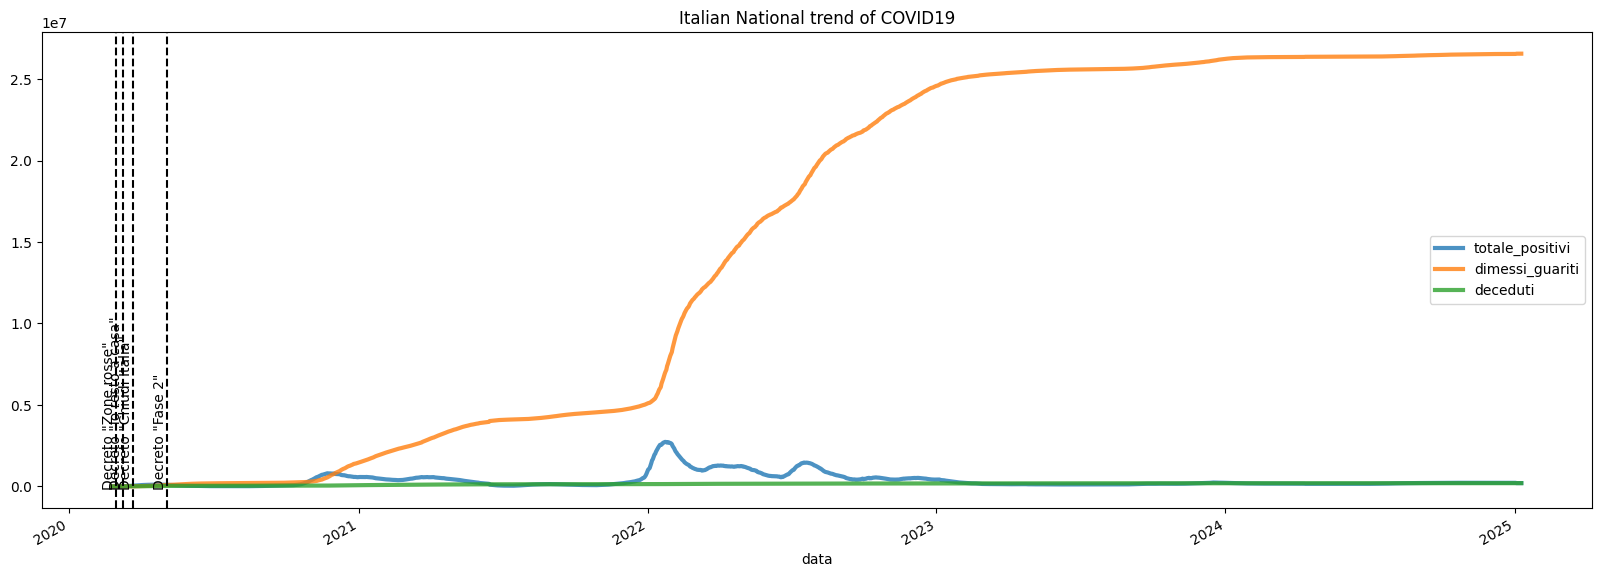

In [88]:
from datetime import datetime

# We now create the plot
covid_italy_filter.plot(figsize=(20, 7), linewidth=3, alpha=0.8, title="Italian National trend of COVID19") 

# and add annotations
annotations = {datetime(2020, 3, 1) :'Decreto "Zone rosse"',
               datetime(2020, 3, 9) :'Decreto "Io resto a casa"',
               datetime(2020, 3, 22):'Decreto "Chiudi Italia"',
               datetime(2020, 5, 4) :'Decreto "Fase 2"'}
 
for d,a in annotations.items():
    plt.annotate(a,(d, 0), rotation=90, horizontalalignment='right')
    plt.axvline(d, color='k', linestyle='--')   
    
plt.show()

We have too many data points 
- making it difficult to focus on the 4 dates of interest

Let's hide some
- using `iloc` to consider the first 100 rows
- using `loc` to consider the rows with date before June
- using `drop` to drop the rows from June onward

But first, let's create a function to add annotations to the _current_ plot

In [73]:
def add_annotations():
    # and add annotations
    annotations = {datetime(2020, 3, 1) :'Decreto "Zone rosse"',
                   datetime(2020, 3, 9) :'Decreto "Io resto a casa"',
                   datetime(2020, 3, 22):'Decreto "Chiudi Italia"',
                   datetime(2020, 5, 4) :'Decreto "Fase 2"'}
 
    for d,a in annotations.items():
        plt.annotate(a,(d, 0), rotation=90, horizontalalignment='right')
        plt.axvline(d, color='k', linestyle='--')   

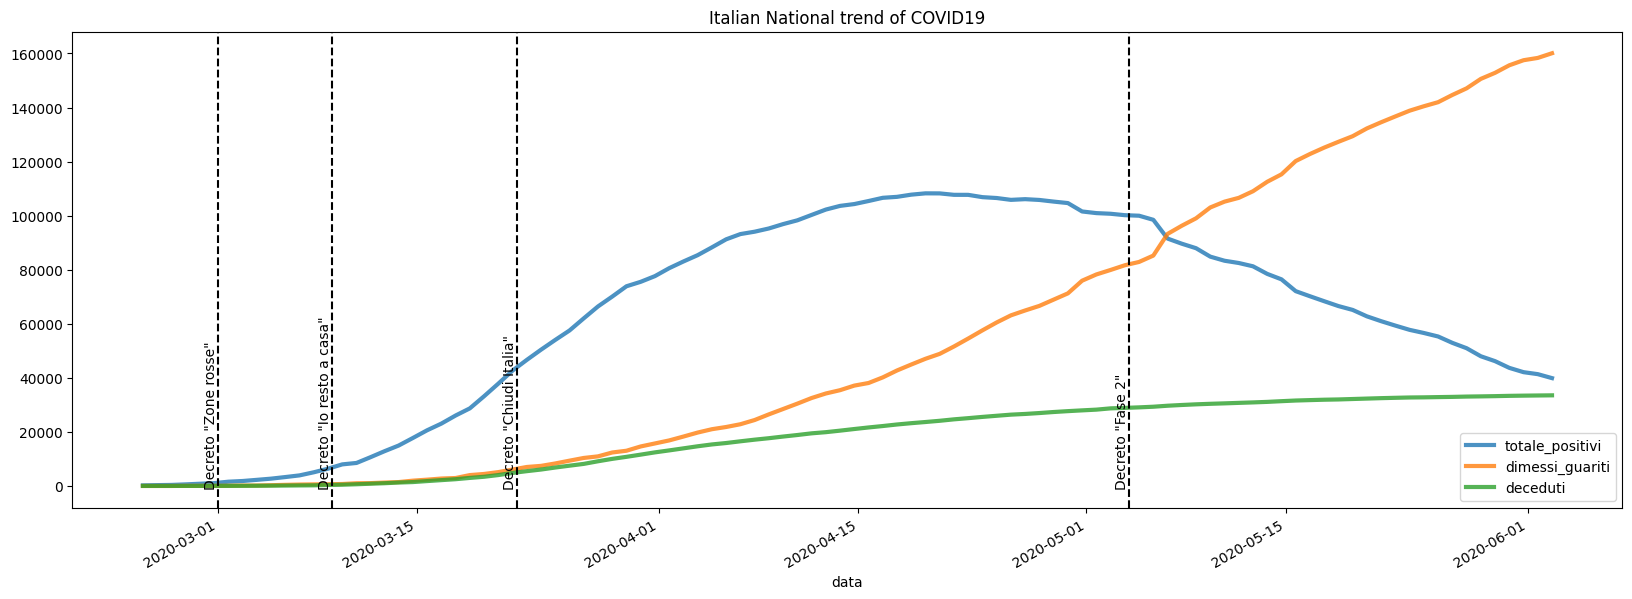

In [74]:
covid_italy_filter.iloc[:100].plot(figsize=(20, 7), linewidth=3, alpha=0.8, title="Italian National trend of COVID19") 
add_annotations() 
plt.show()

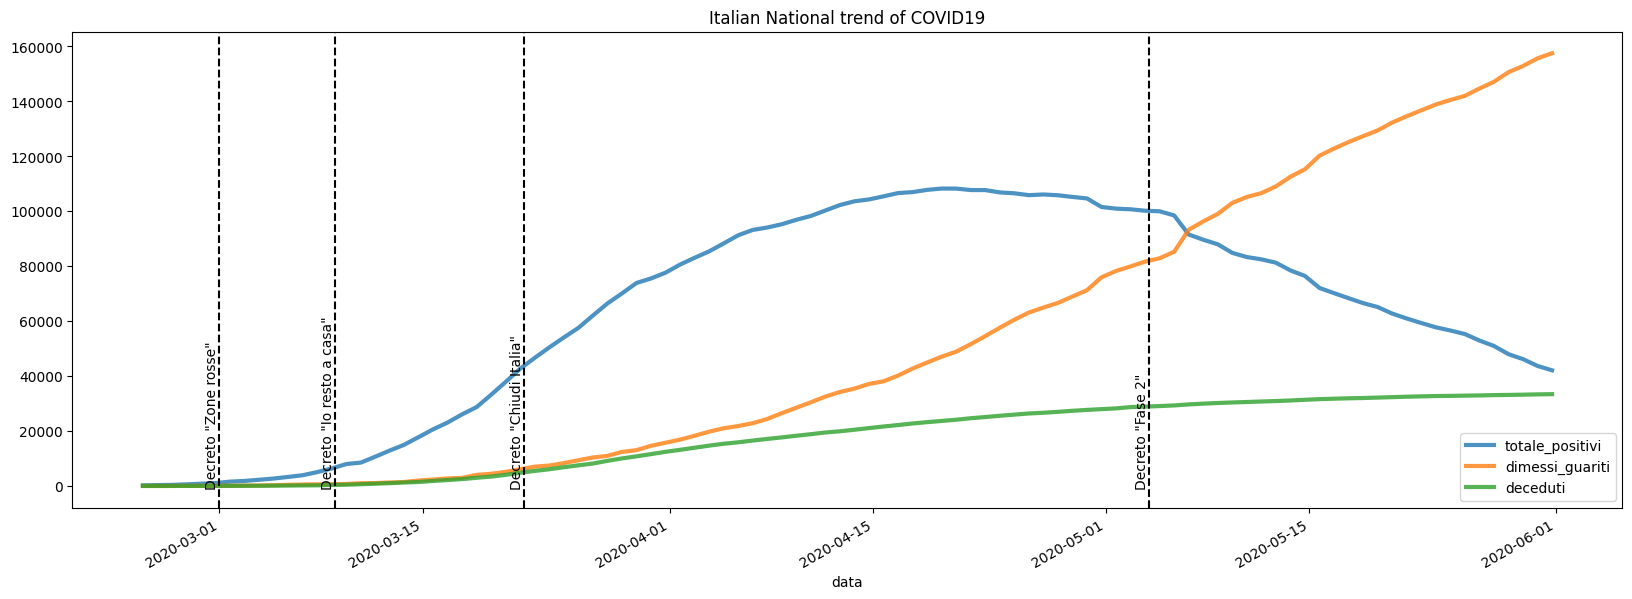

In [75]:
covid_italy_filter.loc[covid_italy_filter.index<= datetime(2020, 6, 1)].plot(figsize=(20, 7), linewidth=3, alpha=0.8, title="Italian National trend of COVID19") 
add_annotations()     
plt.show()

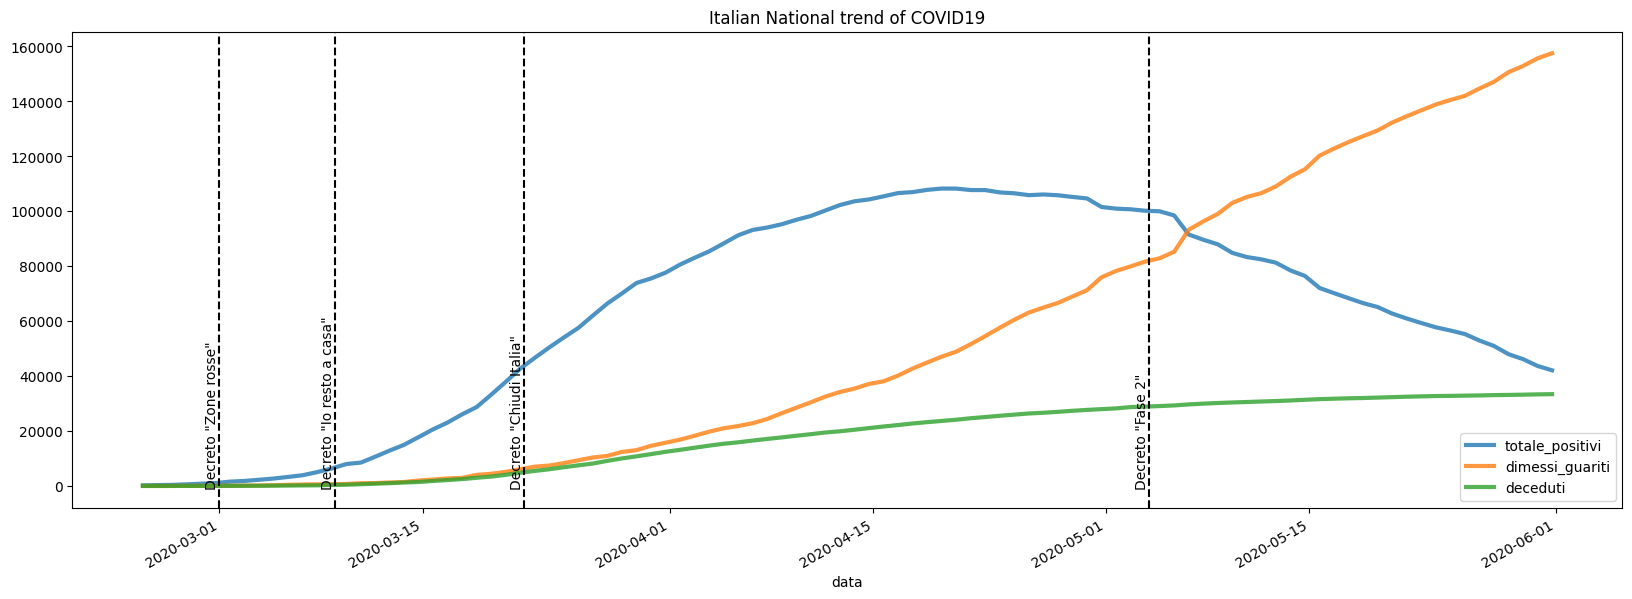

In [76]:
covid_italy_filter.drop(covid_italy_filter[covid_italy_filter.index > datetime(2020, 6, 1)].index).plot(figsize=(20, 7), linewidth=3, alpha=0.8, title="Italian National trend of COVID19") 
add_annotations()     
plt.show()

What about recent months?

<Axes: title={'center': 'Since end of 2021'}, xlabel='data'>

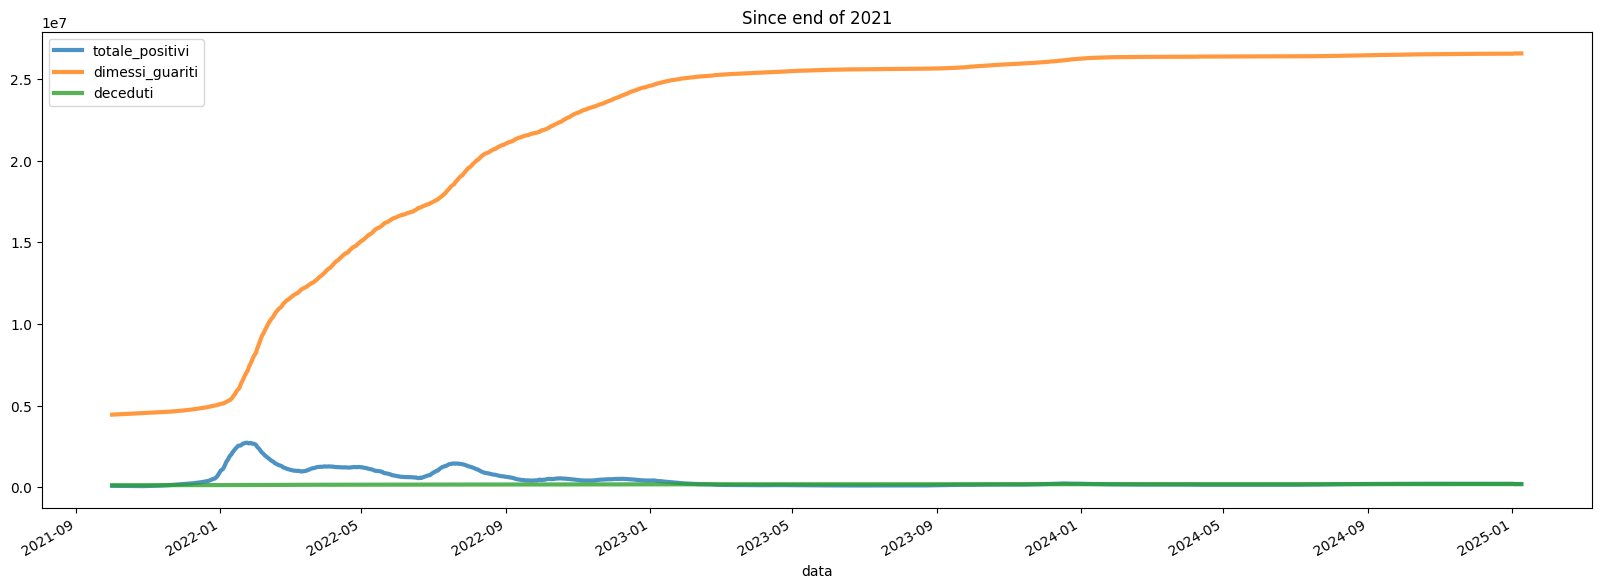

In [77]:
covid_italy_filter.loc[covid_italy_filter.index>= datetime(2021, 10, 1)].plot(figsize=(20, 7), linewidth=3, alpha=0.8, title="Since end of 2021") 



## Bar Plots
Making bar plots instead of line plots is as simple as passing 
* `kind='bar'` (for vertical bars) or 
* `kind='barh'` (for horizontal bars).

<Axes: title={'center': ' Deceduti vs Positivi updated at 01/08/25'}, xlabel='regione'>

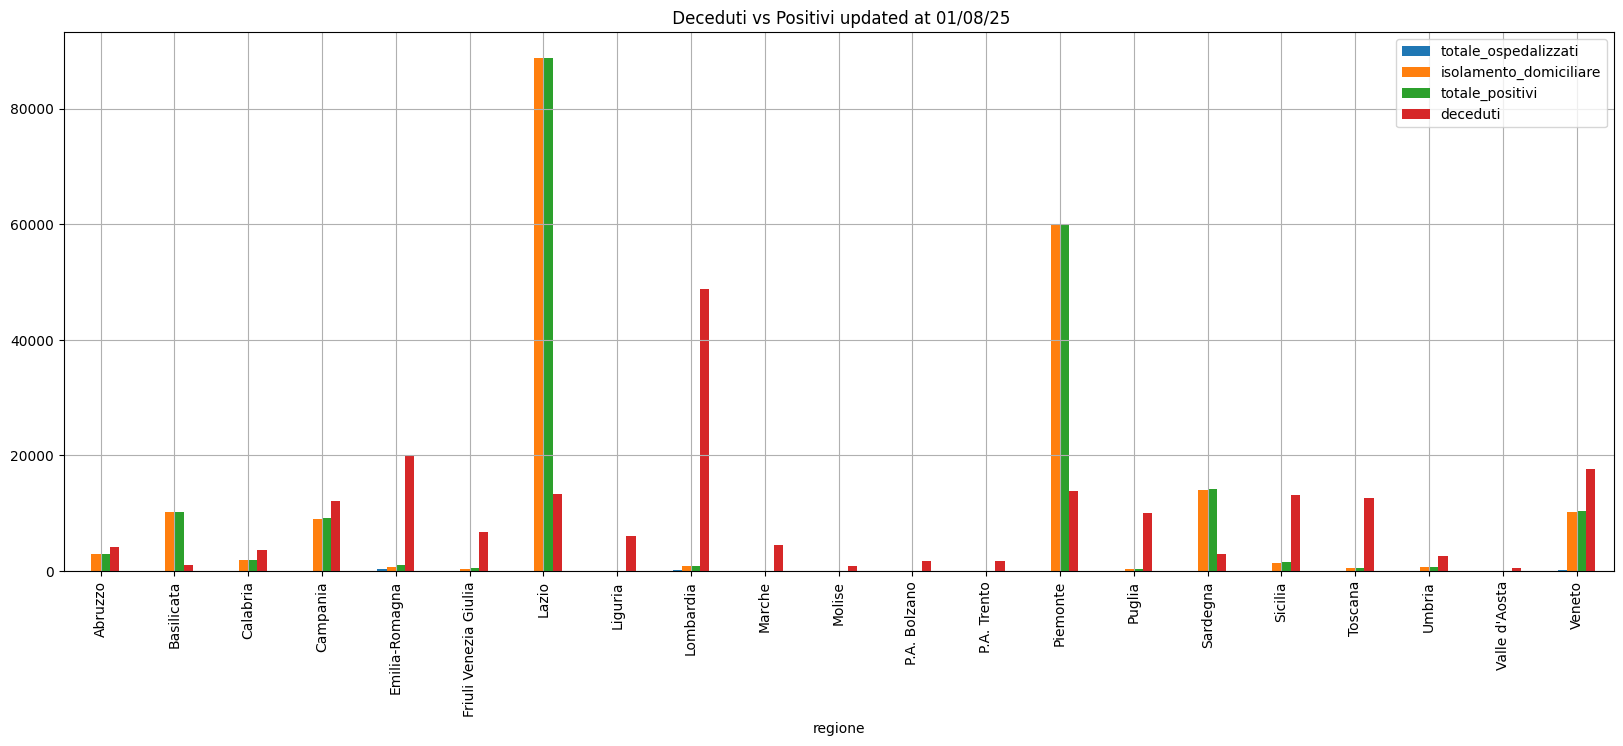

In [78]:
# load data relating to the regional trend of SARS-CoV-2 spread
url_dpc_regioni = 'https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv'
covid_regions = pd.read_csv(url_dpc_regioni)
covid_regions.index = pd.to_datetime(covid_regions.data)
covid_regions = covid_regions.rename(columns={'denominazione_regione': 'regione'})

# get last day data
cov_regions_last_day = covid_regions[covid_regions.data ==  covid_regions.data.iloc[-1]] # get last day data
cov_regions_last_day.index = cov_regions_last_day.regione # set Region as index

#drop some unnecessary columns
cov_regions_last_day = cov_regions_last_day.drop(['lat','long','codice_regione',"stato","regione","note"], axis = 1)

#Let's get the data of interest (Deceduti vs Positivi) and plot them
title = f" Deceduti vs Positivi updated at {covid_regions.index[-1].strftime('%D')}"
#Here we are using 'bar!'
cov_regions_last_day[['totale_ospedalizzati','isolamento_domiciliare','totale_positivi','deceduti']].plot(kind='bar', figsize =(20,7),grid=True,title=title)

#plt.show()

In [79]:
cov_regions_last_day[['totale_ospedalizzati','isolamento_domiciliare','totale_positivi','deceduti']]

totale_ospedalizzati  isolamento_domiciliare  \
regione                                                               
Abruzzo                                  32                    2990   
Basilicata                                0                   10309   
Calabria                                  8                    1851   
Campania                                 85                    9059   
Emilia-Romagna                          383                     684   
Friuli Venezia Giulia                    35                     443   
Lazio                                    60                   88753   
Liguria                                  54                       0   
Lombardia                               113                     843   
Marche                                   37                       0   
Molise                                    0                       0   
P.A. Bolzano                              9                       0   
P.A. Trento                               7                      15   
Piemonte                                 54                   59844   
Puglia                                   22                     278   
Sardegna                                 34                   14097   
Sicilia                                  96                    1415   
Toscana                                 102                     497   
Umbria                                   16                     666   
Valle d'Aosta                             0                       1   
Veneto                                  212                   10201   

                       totale_positivi  deceduti  
regione                                           
Abruzzo                           3022      4115  
Basilicata                       10309      1066  
Calabria                          1859      3728  
Campania                          9144     12169  
Emilia-Romagna                    1067     20158  
Friuli Venezia Giulia              478      6840  
Lazio                            88813     13331  
Liguria                             54      6121  
Lombardia                          956     48739  
Marche                              37      4568  
Molise                               0       800  
P.A. Bolzano                         9      1685  
P.A. Trento                         22      1694  
Piemonte                         59898     13937  
Puglia                             300     10138  
Sardegna                         14131      2988  
Sicilia                           1511     13145  
Toscana                            599     12724  
Umbria                             682      2537  
Valle d'Aosta                        1       592  
Veneto                           10413     17608

### Stacked bar plots
Stacked bar plots are created from a DataFrame by passing `stacked=True`, 
- resulting in the value in each row being stacked together

Let's compare 'terapia_intensiva' and 'totale_ospedalizzati' on latest day

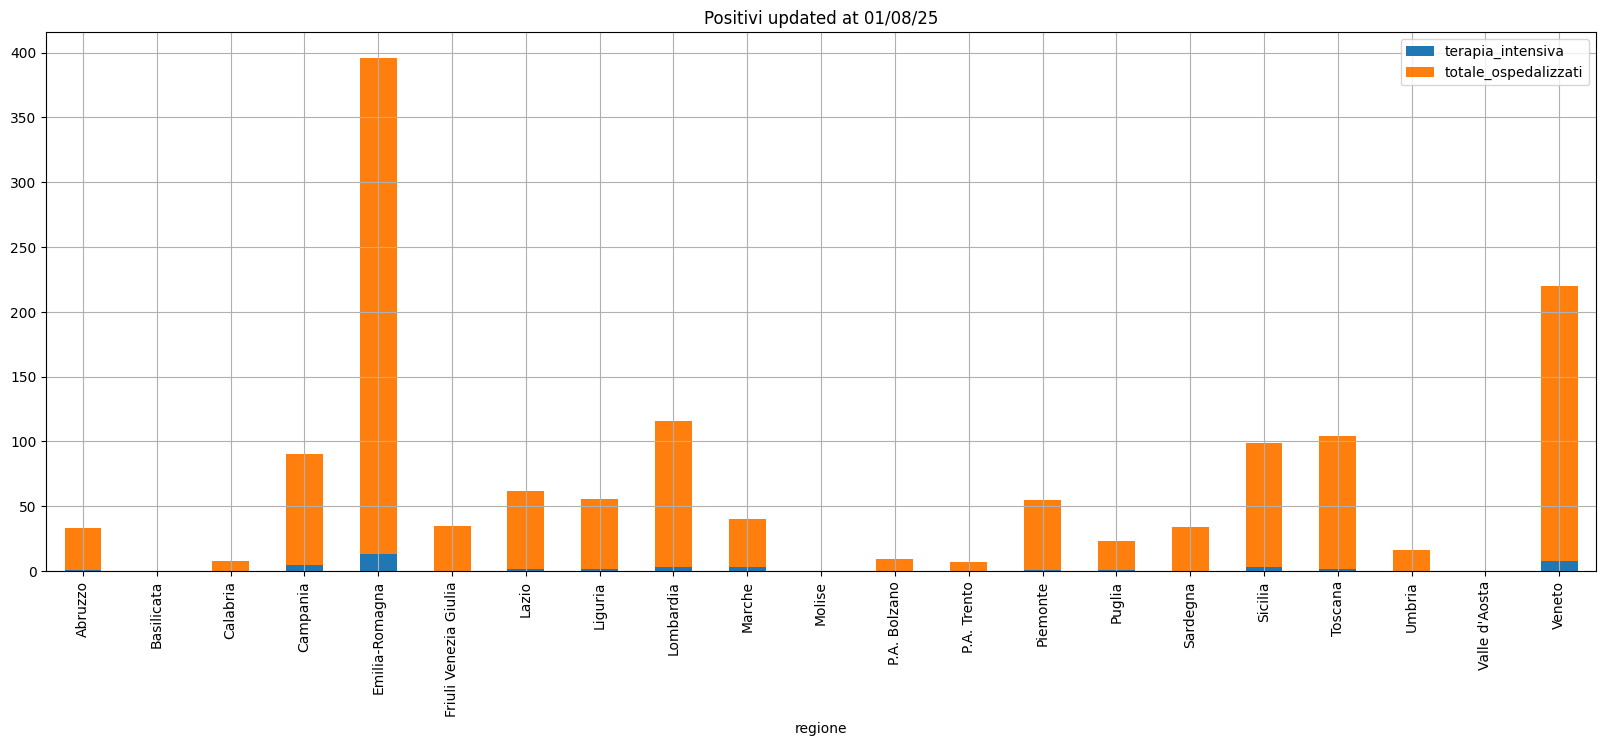

In [80]:
title = f"Positivi updated at {covid_regions.index[-1].strftime('%D')}"
cov_regions_last_day[['terapia_intensiva','totale_ospedalizzati']].plot(kind='bar', stacked=True, figsize =(20,7),grid=True,title=title)
plt.show()

## Scatter Matrix
In exploratory data analysis it is helpful to look at how pairs of variables relate to each other
* we are interested in _plots relating pairs of variables_
* this is known as a _pairs plot_ or _scatter plot matrix_. 

Making such a plot from scratch requires a bit of work. 
* Luckily pandas has a `scatter_matrix` function for creating one from a DataFrame. 
* It also supports placing histograms or density plots of each variable along the diagonal.

In [81]:
covid_italy = pd.read_csv(url_dpc_nazionale, index_col='data')
covid_italy.index = pd.to_datetime(covid_italy.index) # converts 'data' column from object to datatime type
covid_italy.tail()

stato  ricoverati_con_sintomi  terapia_intensiva  \
data                                                                   
2025-01-04 17:00:00   ITA                    1278                 45   
2025-01-05 17:00:00   ITA                    1267                 48   
2025-01-06 17:00:00   ITA                    1289                 49   
2025-01-07 17:00:00   ITA                    1314                 48   
2025-01-08 17:00:00   ITA                    1315                 44   

                     totale_ospedalizzati  isolamento_domiciliare  \
data                                                                
2025-01-04 17:00:00                  1323                  201663   
2025-01-05 17:00:00                  1315                  201806   
2025-01-06 17:00:00                  1338                  201783   
2025-01-07 17:00:00                  1362                  201844   
2025-01-08 17:00:00                  1359                  201946   

                     totale_positivi  variazione_totale_positivi  \
data                                                               
2025-01-04 17:00:00           202986                          74   
2025-01-05 17:00:00           203121                         135   
2025-01-06 17:00:00           203121                           0   
2025-01-07 17:00:00           203206                          85   
2025-01-08 17:00:00           203305                          99   

                     nuovi_positivi  dimessi_guariti  deceduti  ...  \
data                                                            ...   
2025-01-04 17:00:00             280         26562161    198666  ...   
2025-01-05 17:00:00             196         26562218    198670  ...   
2025-01-06 17:00:00             101         26562319    198670  ...   
2025-01-07 17:00:00             155         26562384    198674  ...   
2025-01-08 17:00:00             390         26562666    198683  ...   

                       tamponi  casi_testati  note  \
data                                                 
2025-01-04 17:00:00  284325249    70571636.0   NaN   
2025-01-05 17:00:00  284329947    70572388.0   NaN   
2025-01-06 17:00:00  284333343    70573017.0   NaN   
2025-01-07 17:00:00  284338302    70573883.0   NaN   
2025-01-08 17:00:00  284349697    70575339.0   NaN   

                     ingressi_terapia_intensiva  note_test note_casi  \
data                                                                   
2025-01-04 17:00:00                         3.0        NaN       NaN   
2025-01-05 17:00:00                         3.0        NaN       NaN   
2025-01-06 17:00:00                         2.0        NaN       NaN   
2025-01-07 17:00:00                         0.0        NaN       NaN   
2025-01-08 17:00:00                         3.0        NaN       NaN   

                     totale_positivi_test_molecolare  \
data                                                   
2025-01-04 17:00:00                        9973077.0   
2025-01-05 17:00:00                        9973129.0   
2025-01-06 17:00:00                        9973158.0   
2025-01-07 17:00:00                        9973220.0   
2025-01-08 17:00:00                        9973389.0   

                     totale_positivi_test_antigenico_rapido  \
data                                                          
2025-01-04 17:00:00                              16990736.0   
2025-01-05 17:00:00                              16990880.0   
2025-01-06 17:00:00                              16990952.0   
2025-01-07 17:00:00                              16991044.0   
2025-01-08 17:00:00                              16991265.0   

                     tamponi_test_molecolare  tamponi_test_antigenico_rapido  
data                                                                          
2025-01-04 17:00:00              103275200.0                     181050049.0  
2025-01-05 17:00:00              103276127.0                     181053820.0  
2025-01-06 17:00:00  

In [82]:
#drop unnecessary columns
covid_italy.drop(columns=["note_test","note_casi"], inplace=True)

In [83]:
covid_italy['totale_casi']

data
2020-02-24 18:00:00         229
2020-02-25 18:00:00         322
2020-02-26 18:00:00         400
2020-02-27 18:00:00         650
2020-02-28 18:00:00         888
                         ...   
2025-01-04 17:00:00    26963813
2025-01-05 17:00:00    26964009
2025-01-06 17:00:00    26964110
2025-01-07 17:00:00    26964264
2025-01-08 17:00:00    26964654
Name: totale_casi, Length: 1781, dtype: int64

In [84]:
covid_italy['terapia_intensiva']

data
2020-02-24 18:00:00    26
2020-02-25 18:00:00    35
2020-02-26 18:00:00    36
2020-02-27 18:00:00    56
2020-02-28 18:00:00    64
                       ..
2025-01-04 17:00:00    45
2025-01-05 17:00:00    48
2025-01-06 17:00:00    49
2025-01-07 17:00:00    48
2025-01-08 17:00:00    44
Name: terapia_intensiva, Length: 1781, dtype: int64

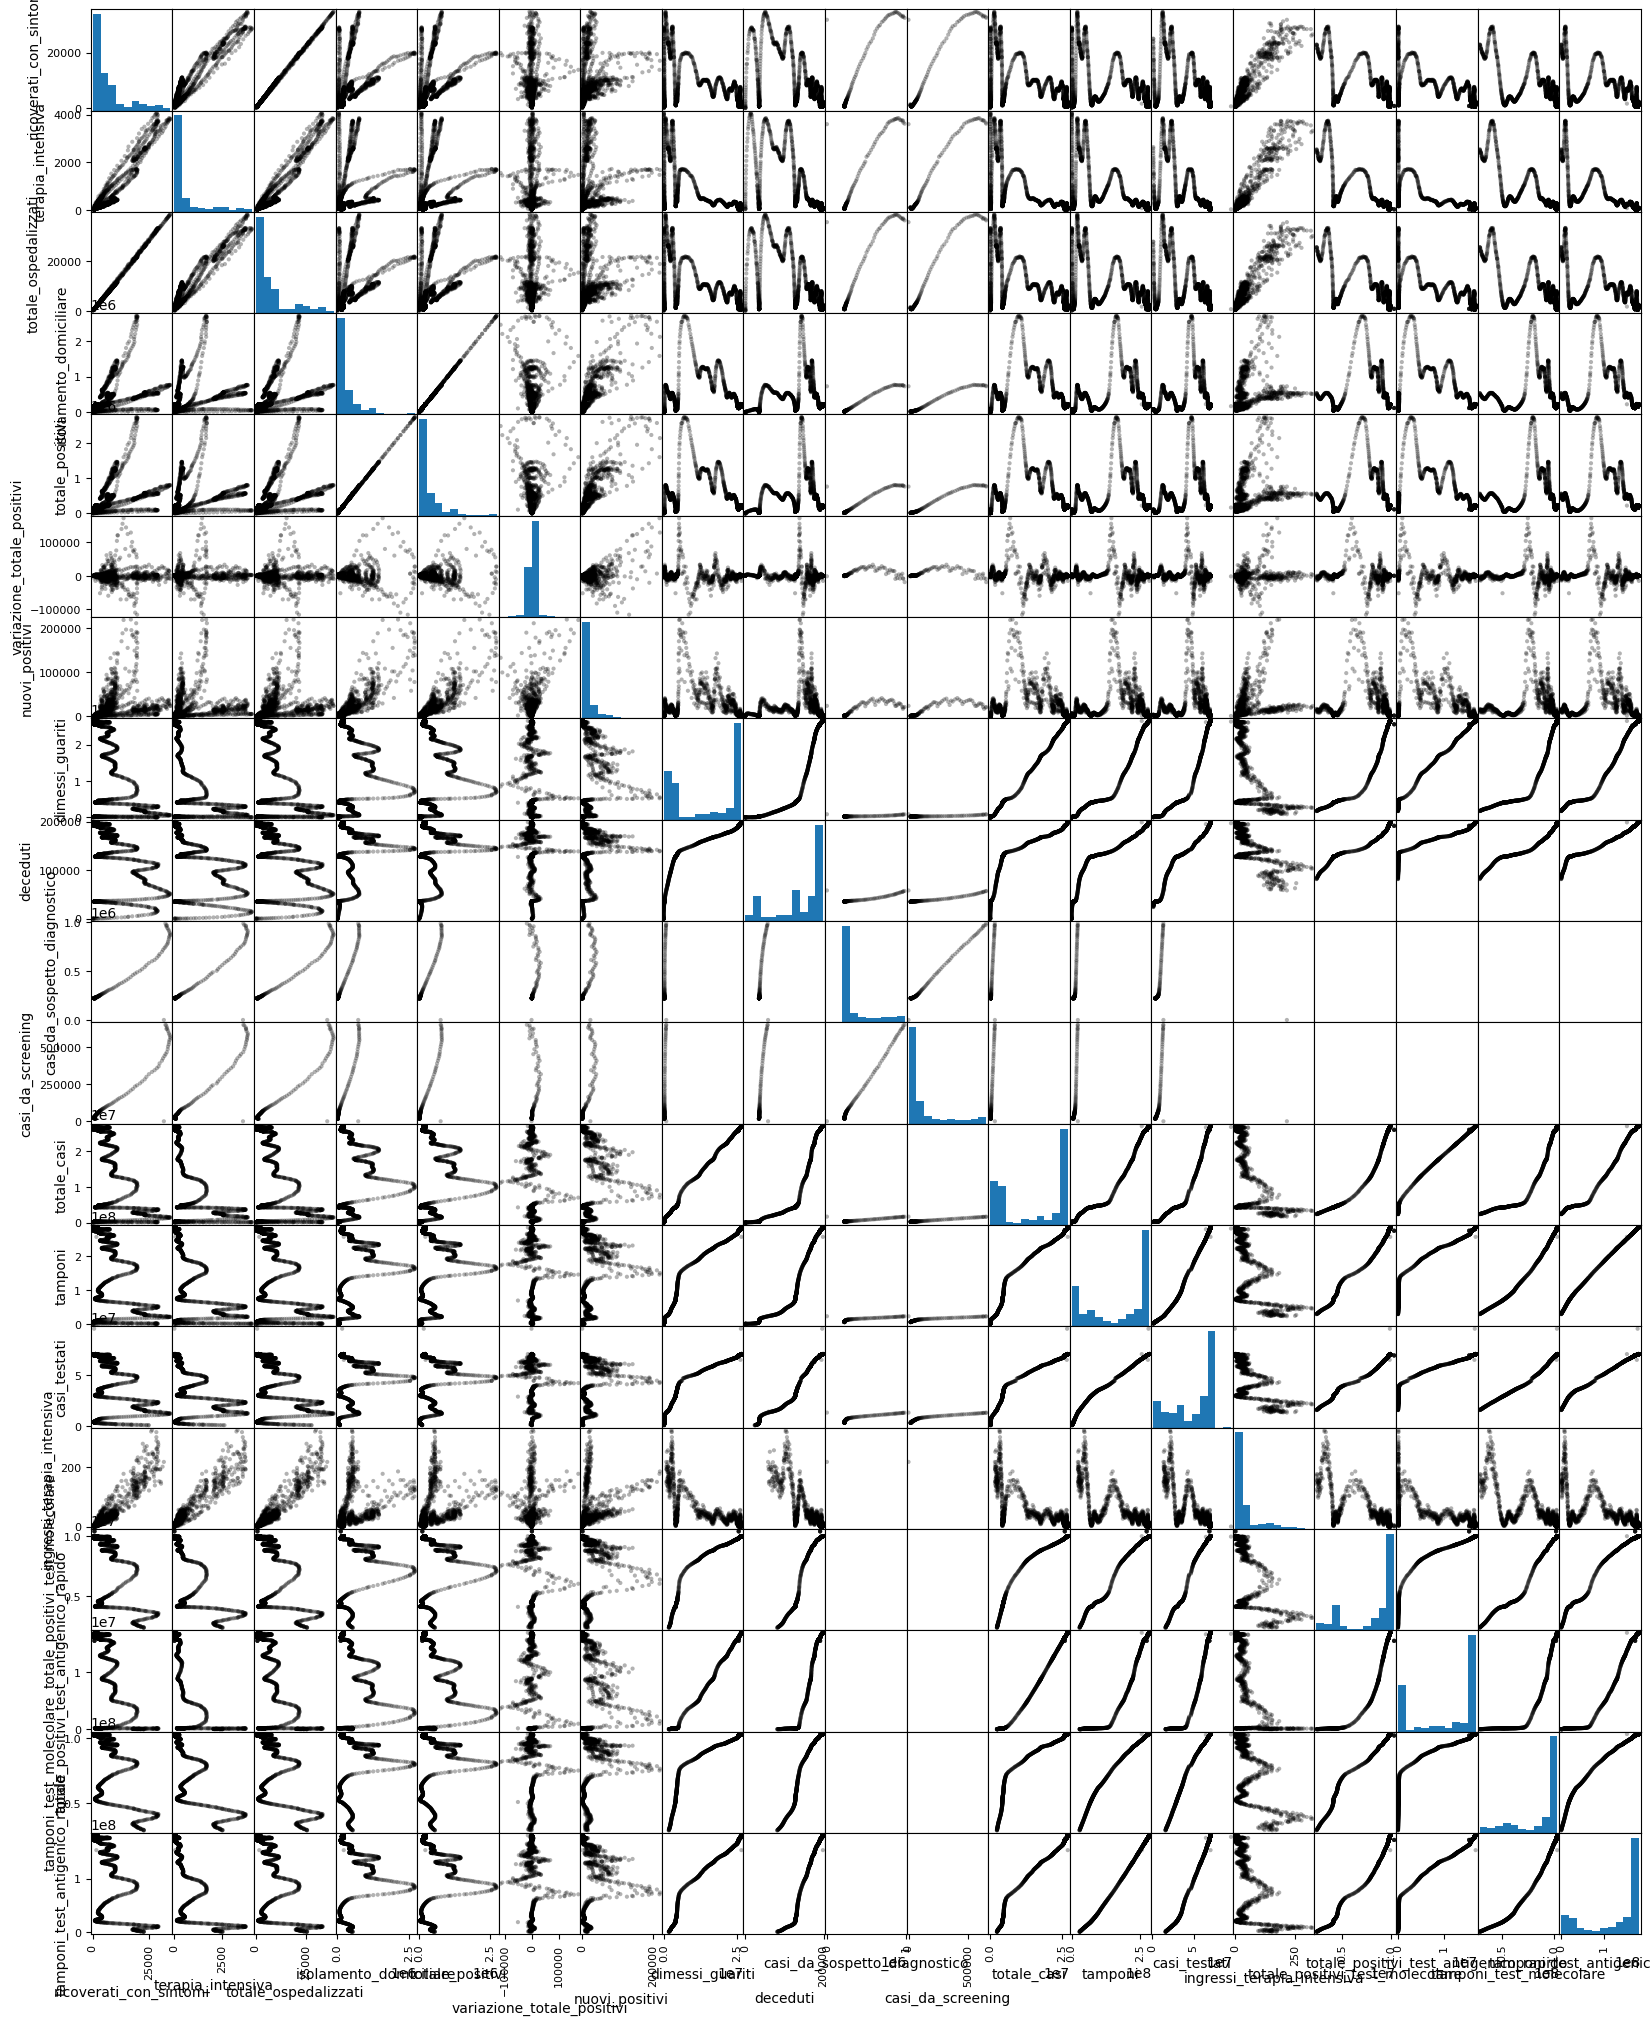

In [85]:
pd.plotting.scatter_matrix(covid_italy,figsize =(20,25),  color='k', alpha=0.3)
plt.show()

Too much data here!
- let's remove some more mostly empty rows

In [86]:
covid_italy[["totale_positivi_test_molecolare","totale_positivi_test_antigenico_rapido","tamponi_test_molecolare","tamponi_test_antigenico_rapido"]]

totale_positivi_test_molecolare  \
data                                                   
2020-02-24 18:00:00                              NaN   
2020-02-25 18:00:00                              NaN   
2020-02-26 18:00:00                              NaN   
2020-02-27 18:00:00                              NaN   
2020-02-28 18:00:00                              NaN   
...                                              ...   
2025-01-04 17:00:00                        9973077.0   
2025-01-05 17:00:00                        9973129.0   
2025-01-06 17:00:00                        9973158.0   
2025-01-07 17:00:00                        9973220.0   
2025-01-08 17:00:00                        9973389.0   

                     totale_positivi_test_antigenico_rapido  \
data                                                          
2020-02-24 18:00:00                                     NaN   
2020-02-25 18:00:00                                     NaN   
2020-02-26 18:00:00                                     NaN   
2020-02-27 18:00:00                                     NaN   
2020-02-28 18:00:00                                     NaN   
...                                                     ...   
2025-01-04 17:00:00                              16990736.0   
2025-01-05 17:00:00                              16990880.0   
2025-01-06 17:00:00                              16990952.0   
2025-01-07 17:00:00                              16991044.0   
2025-01-08 17:00:00                              16991265.0   

                     tamponi_test_molecolare  tamponi_test_antigenico_rapido  
data                                                                          
2020-02-24 18:00:00                      NaN                             NaN  
2020-02-25 18:00:00                      NaN                             NaN  
2020-02-26 18:00:00                      NaN                             NaN  
2020-02-27 18:00:00                      NaN                             NaN  
2020-02-28 18:00:00                      NaN                             NaN  
...                                      ...                             ...  
2025-01-04 17:00:00              103275200.0                     181050049.0  
2025-01-05 17:00:00              103276127.0                     181053820.0  
2025-01-06 17:00:00              103276857.0                     181056486.0  
2025-01-07 17:00:00              103277626.0                     181060676.0  
2025-01-08 17:00:00              103279246.0                     181070451.0  

[1781 rows x 4 columns]

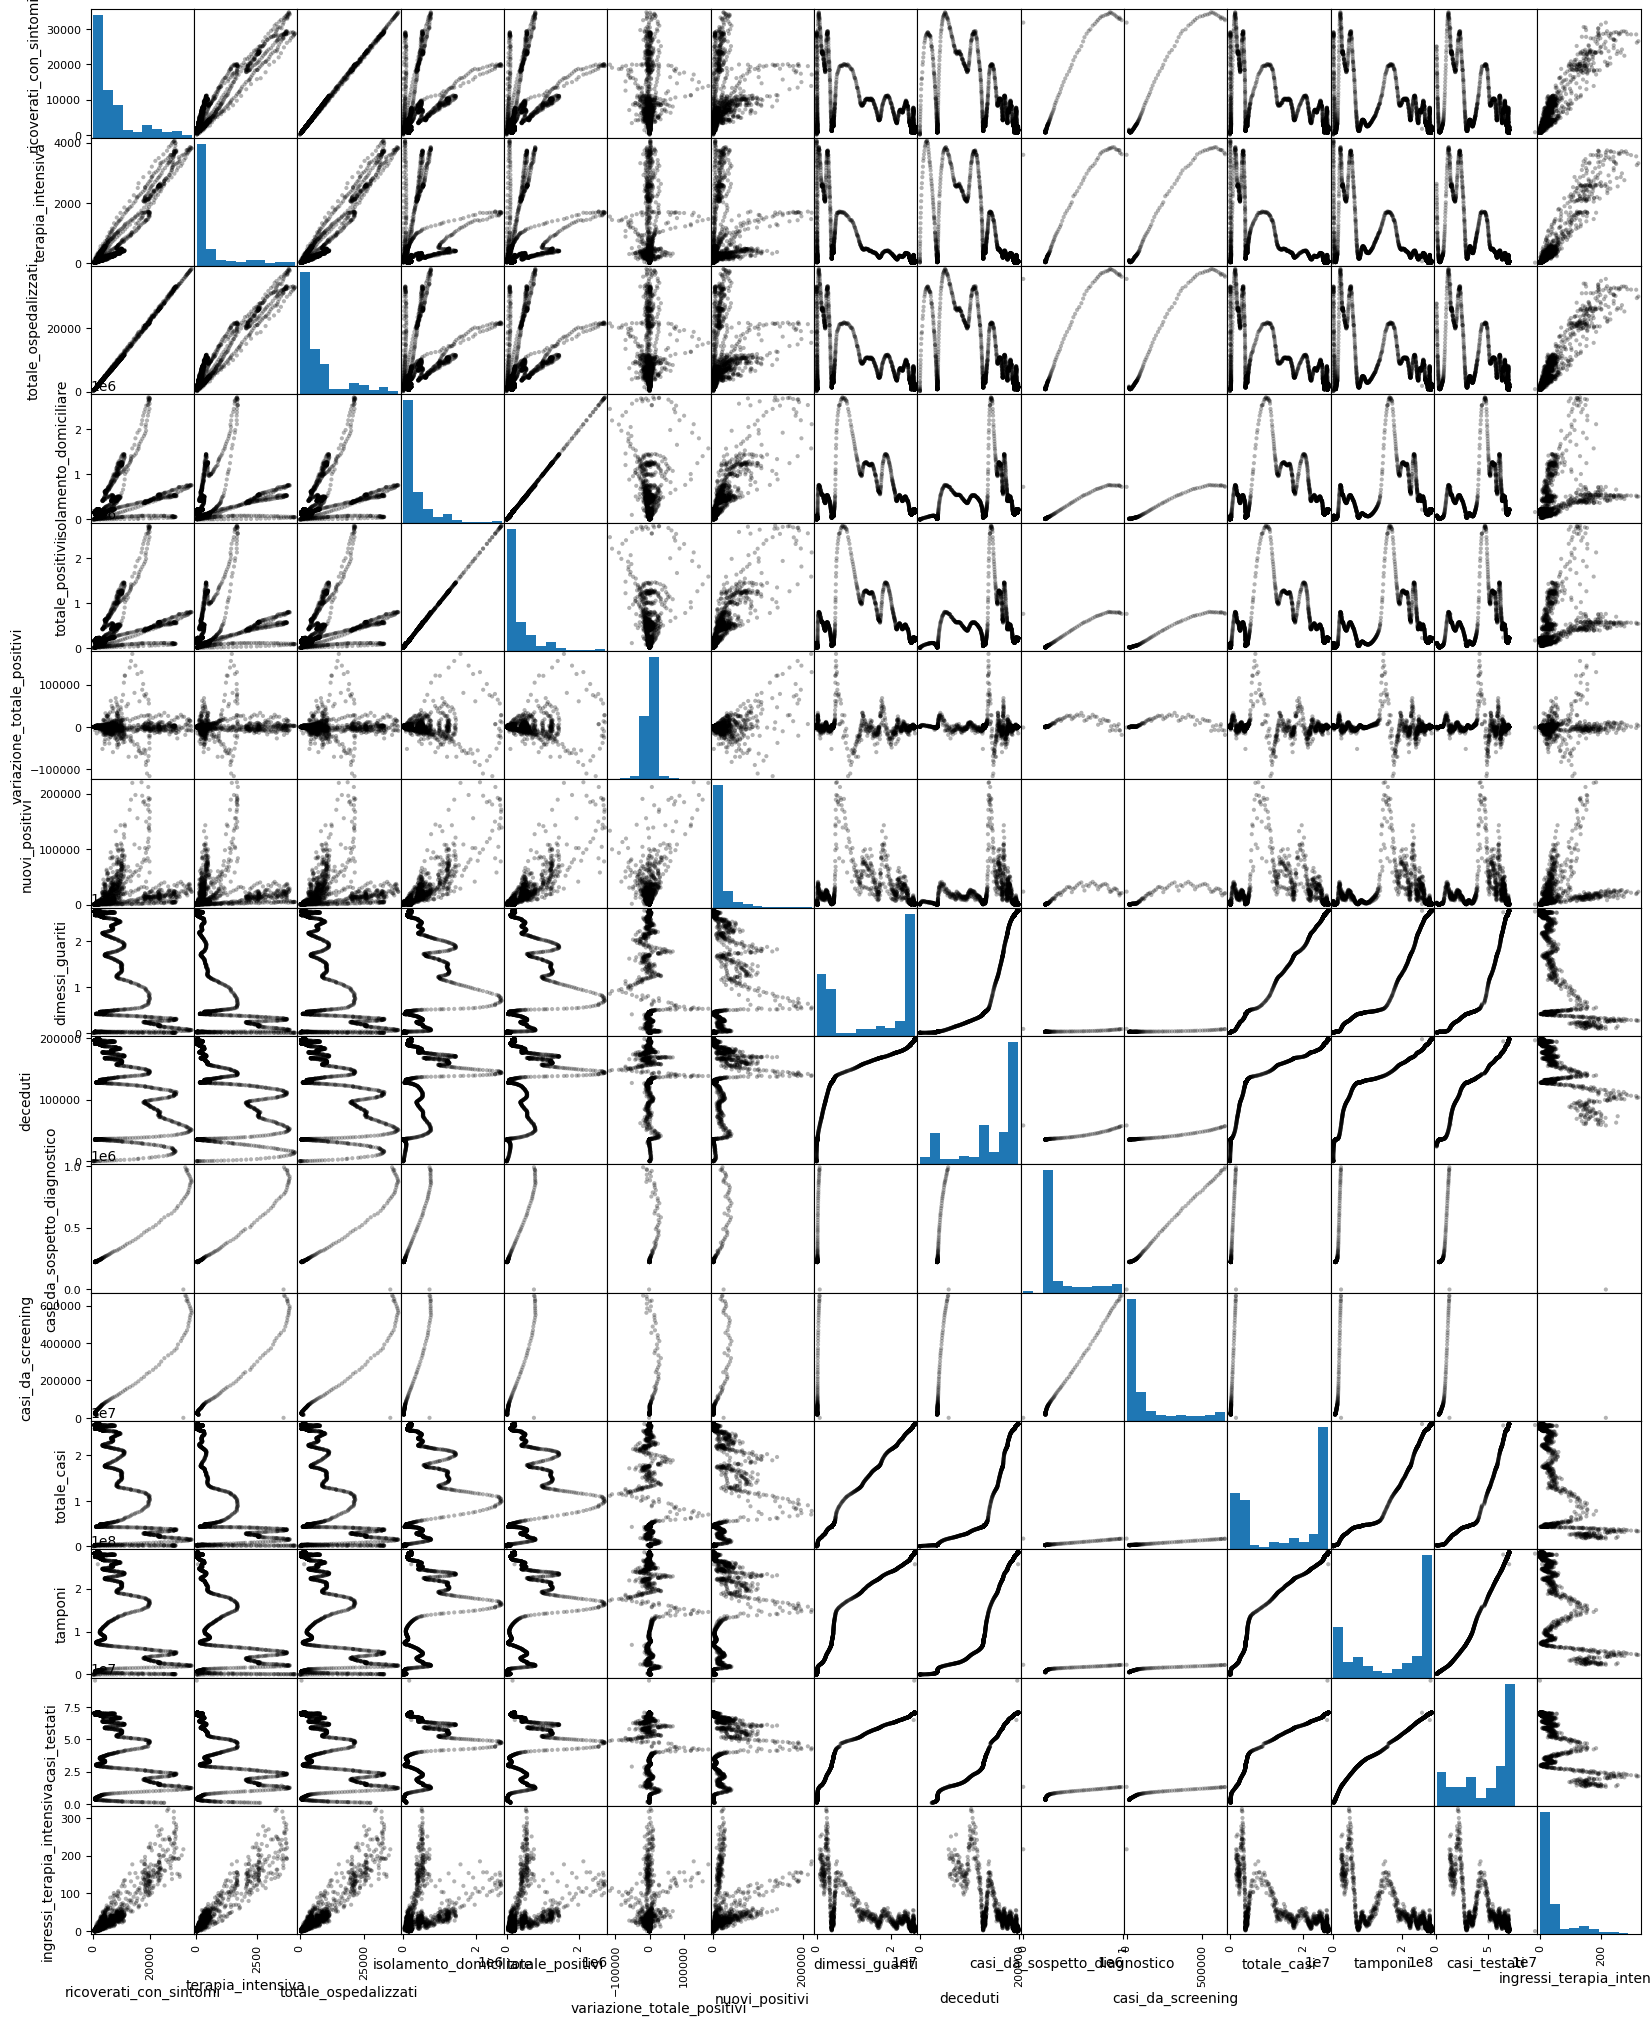

In [87]:
covid_italy.drop(columns=["totale_positivi_test_molecolare","totale_positivi_test_antigenico_rapido","tamponi_test_molecolare","tamponi_test_antigenico_rapido"], inplace=True)
pd.plotting.scatter_matrix(covid_italy,figsize =(20,25),  color='k', alpha=0.3)
plt.show()